# <font color="orange">Click Through Rate Assignment - Vatsal</font>

## Import All Libraries/Modules

In [124]:
# Import Statements
# Basic Python Stuff
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
#import yellowbrick as yb

#Scikit Learn
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.dummy import DummyClassifier

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import RandomizedSearchCV,KFold,cross_val_score,train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectKBest, f_classif

from sklearn import metrics
from sklearn.metrics import accuracy_score,auc,balanced_accuracy_score,confusion_matrix,f1_score,log_loss,mean_squared_error,precision_score,r2_score,recall_score,roc_auc_score,roc_curve,classification_report

#xgboost
import xgboost as xgb

#statsmodels
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf

#PCA
from sklearn.decomposition import PCA

#KMeans
from sklearn.cluster import KMeans

#system stuff
import os
import sys
import datetime as dt
from datetime import timedelta
from datetime import datetime,date

import warnings
warnings.filterwarnings("ignore")
#Personal Python Code
#import show_corr

In [125]:
!which python3

/Library/Frameworks/Python.framework/Versions/3.9/bin/./python3


## Read the dataset to a Pandas Dataframe

In [126]:
crd = pd.read_csv("data.csv")
crd.head()

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
0,False,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,2528,0,39,100075,221,10,1,28,14,0
1,True,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,1934,2,39,-1,16,10,2,22,19,1
2,False,1005,0,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,2552,3,167,100202,23,10,3,23,18,0
3,False,1002,0,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,0fa578fd,...,2478,3,167,100074,23,10,2,22,19,0
4,True,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,1722,0,35,-1,79,10,1,21,8,1


In [127]:
crd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   click             99999 non-null  bool  
 1   C1                99999 non-null  int64 
 2   banner_pos        99999 non-null  int64 
 3   site_id           99999 non-null  object
 4   site_domain       99999 non-null  object
 5   site_category     99999 non-null  object
 6   app_id            99999 non-null  object
 7   app_domain        99999 non-null  object
 8   app_category      99999 non-null  object
 9   device_id         99999 non-null  object
 10  device_ip         99999 non-null  object
 11  device_model      99999 non-null  object
 12  device_type       99999 non-null  int64 
 13  device_conn_type  99999 non-null  int64 
 14  C14               99999 non-null  int64 
 15  C15               99999 non-null  int64 
 16  C16               99999 non-null  int64 
 17  C17         

In [128]:
crd.describe()

,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
count,99999.000000,99999.000000,99999.00000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.0,99999.000000,99999.000000,99999.000000,99999.000000
mean,1004.967550,0.289943,1.01639,0.329453,18857.231732,318.834548,60.278743,2114.613036,1.439904,227.234932,53292.001950,83.163542,10.0,2.592836,25.485755,11.300673,0.169802
std,1.091916,0.505707,0.53110,0.854673,4944.919482,21.510752,47.713436,607.469442,1.326824,351.472366,49952.340367,70.161076,0.0,1.723003,2.968520,5.938725,0.375460
min,1001.000000,0.000000,0.00000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,1.000000,10.0,0.000000,21.000000,0.000000,0.000000
25%,1005.000000,0.000000,1.00000,0.000000,16920.000000,320.000000,50.000000,1863.000000,0.000000,35.000000,-1.000000,23.000000,10.0,1.000000,23.000000,7.000000,0.000000
50%,1005.000000,0.000000,1.00000,0.000000,20346.000000,320.000000,50.000000,2323.000000,2.000000,39.000000,100050.000000,61.000000,10.0,2.000000,26.000000,11.000000,0.000000
75%,1005.000000,1.000000,1.00000,0.000000,21893.000000,320.000000,50.000000,2526.000000,3.000000,171.000000,100093.000000,101.000000,10.0,4.000000,28.000000,16.000000,0.000000
max,1012.000000,7.000000,5.00000,5.000000,24043.000000,1024.000000,1024.000000,2757.000000,3.000000,1839.000000,100248.000000,255.000000,10.0,6.000000,30.000000,23.000000,1.000000


# <font color="#306EFF">EDA</font>

## Let's look if the data is imbalanced for the target  variable

In [129]:
100*crd[["click","y"]].value_counts(normalize=True).reset_index()

,click,y,0
0,0,0,83.01983
1,100,100,16.98017


### The data is imbalanced balanced for the target Variable. 0 - 83%, 1 - 17%

### Let's plot a chart for the sample distribution

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


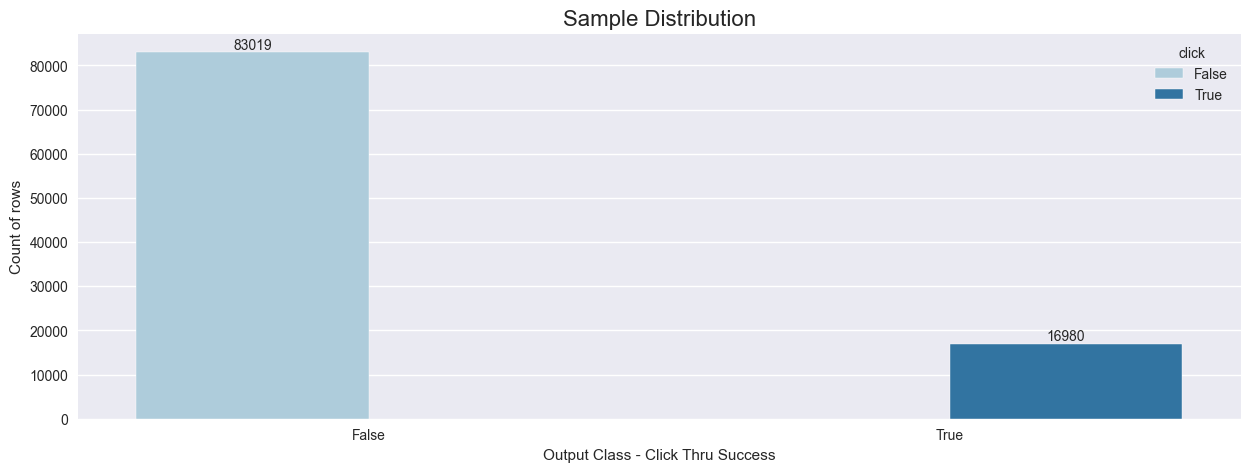

In [130]:
plt.figure(figsize=(15,5))
chart = crd[["click","y"]].value_counts().reset_index().pipe((sns.barplot,"data"),x="click",y=0,hue="click",palette="Paired")
plt.xlabel("Output Class - Click Thru Success")
plt.ylabel("Count of rows")
plt.title('Sample Distribution', fontsize=16)

for p in chart.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    chart.text(x+width/2,
               (y+height),
               '{:.0f}'.format(height),
               horizontalalignment='center',
               verticalalignment='bottom',fontsize=10)
plt.show()

## Writing a function func_stats to generate some interesting stats for the dataframe

In [131]:
def func_stats(crd):
    col_stats = []
    for x in crd.columns:
        col_stats.append([x,
                          crd[x].dtype,
                          crd[x].unique().size,
                          round(100*crd[x].unique().size/crd[x].size,2),
                          ((100*crd[x].value_counts()/crd[x].size).sort_values(ascending=False)).index[0],
                          ((100*crd[x].value_counts()/crd[x].size).sort_values(ascending=False)).iloc[0]])

    df_stats = pd.DataFrame(np.array(col_stats),columns=["Column",
                                                         "Type",
                                                         "NumOfUniqueValues",
                                                         "PercentUnqOfTotal",
                                                         "MostAppearing","MostAppearing%"]).sort_values(by="PercentUnqOfTotal",ascending=False)
    return df_stats.sort_values(by="MostAppearing%",ascending=False)

In [132]:
func_stats(crd)

,Column,Type,NumOfUniqueValues,PercentUnqOfTotal,MostAppearing,MostAppearing%
22,month,int64,1,0.0,10,100.0
16,C16,int64,9,0.01,50,94.209942
15,C15,int64,8,0.01,320,93.136931
12,device_type,int64,4,0.0,1,92.239922
1,C1,int64,7,0.01,1005,91.862919
13,device_conn_type,int64,4,0.0,0,86.413864
26,y,int64,2,0.0,0,83.01983
0,click,bool,2,0.0,False,83.01983
9,device_id,object,16801,16.8,a99f214a,82.579826
2,banner_pos,int64,7,0.01,0,71.778718


## Map Columns Names with Prettier names for use with plots

In [133]:
col_dict1={"hour":["Hour of the Day"],
           "day":["Day"],
           "dayofweek":["Day of the Week"],
           "month":["Month"],
           "banner_pos":["Banner Position"],
           "site_id": ["Site ID"],
           "site_domain": ["Site Domain"],
           "site_category":["Site Category"],
           "app_id": ["App ID"],
           "app_domain": ["App Domain"],
           "app_category":["App Category"],
           "device_id": ["Device ID"],
           "device_ip": ["Device IP"],
           "device_model": ["Device Model"],
           "device_type":["Device Type"],
           "device_conn_type":["Device Connection Type"],
           "C1":["C1"],
           "C14":["C14"],
           "C15":["C15"],
           "C16":["C16"],
           "C17":["C17"],
           "C18":["C18"],
           "C19":["C19"],
           "C20":["C20"],
           "C21":["C21"]
           }

## Plot hour,day, day of the week and month against the target variable click/y (True/False 1/0) and see the count of data the categories within represent

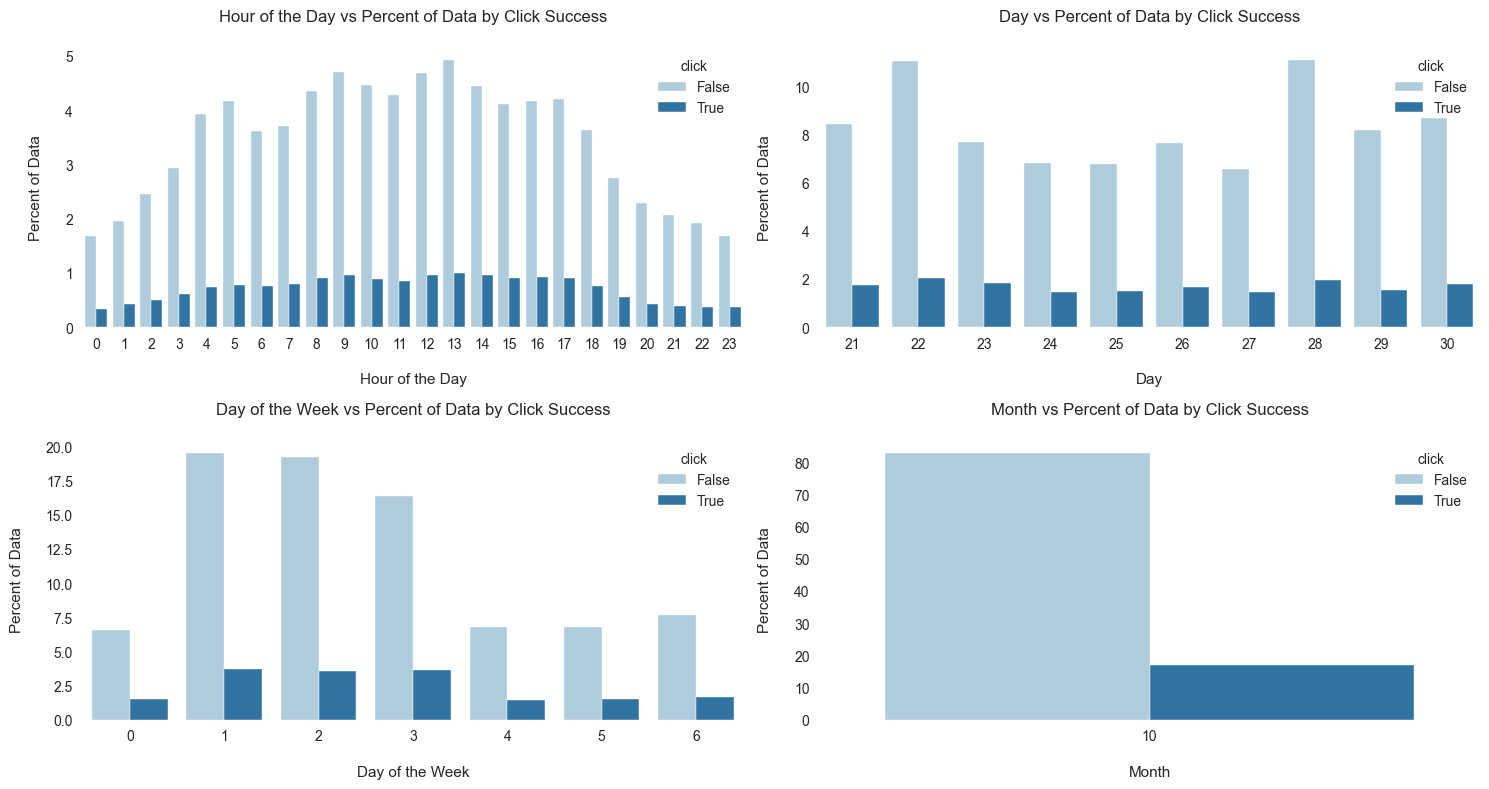

In [134]:
#hour
res = list(range(0,len(col_dict1.keys())))
sns.set_style("whitegrid", {'axes.grid' : False, 'axes.edgecolor': 'lightblue'})
fig,axs = plt.subplots(2,2,figsize=(15,8))
counter=0
x = list(col_dict1.keys())[counter]
df_chart = (round(100*crd[[x,"click"]].value_counts(normalize=True),2).reset_index()).sort_values(by=[x,"click"])
res[counter] = sns.barplot(df_chart,x=x,y=0,hue="click",palette="Paired",ax=axs[0,0])
res[counter].set_xlabel("\n"+col_dict1[x][0])
res[counter].set_ylabel("Percent of Data\n")
res[counter].set_title(col_dict1[x][0]+" vs Percent of Data by Click Success\n")
plt.setp(res[counter].xaxis.get_majorticklabels(),fontsize=10)

#day
counter=1
x = list(col_dict1.keys())[counter]
df_chart = (round(100*crd[[x,"click"]].value_counts(normalize=True),2).reset_index()).sort_values(by=[x,"click"])
res[counter] = sns.barplot(df_chart,x=x,y=0,hue="click",palette="Paired",ax=axs[0,1])
res[counter].set_xlabel("\n"+col_dict1[x][0])
res[counter].set_ylabel("Percent of Data\n")
res[counter].set_title(col_dict1[x][0]+" vs Percent of Data by Click Success\n")
sns.move_legend(res[counter],"upper right")

plt.setp(res[counter].xaxis.get_majorticklabels(),fontsize=10)

#day of the week
counter=2
x = list(col_dict1.keys())[counter]
df_chart = (round(100*crd[[x,"click"]].value_counts(normalize=True),2).reset_index()).sort_values(by=[x,"click"])
res[counter] = sns.barplot(df_chart,x=x,y=0,hue="click",palette="Paired",ax=axs[1,0])
res[counter].set_xlabel("\n"+col_dict1[x][0])
res[counter].set_ylabel("Percent of Data\n")
res[counter].set_title(col_dict1[x][0]+" vs Percent of Data by Click Success\n")

plt.setp(res[counter].xaxis.get_majorticklabels(),fontsize=10)

#Month
counter=3
x = list(col_dict1.keys())[counter]
df_chart = (round(100*crd[[x,"click"]].value_counts(normalize=True),2).reset_index()).sort_values(by=[x,"click"])
res[counter] = sns.barplot(df_chart,x=x,y=0,hue="click",palette="Paired",ax=axs[1,1])
res[counter].set_xlabel("\n"+col_dict1[x][0])
res[counter].set_ylabel("Percent of Data\n")
res[counter].set_title(col_dict1[x][0]+" vs Percent of Data by Click Success\n")

plt.setp(res[counter].xaxis.get_majorticklabels(),fontsize=10)

plt.tight_layout()
plt.savefig("01 - Hour-Day-Week-Month Analysis.jpeg",dpi=400, bbox_inches='tight')
plt.show()

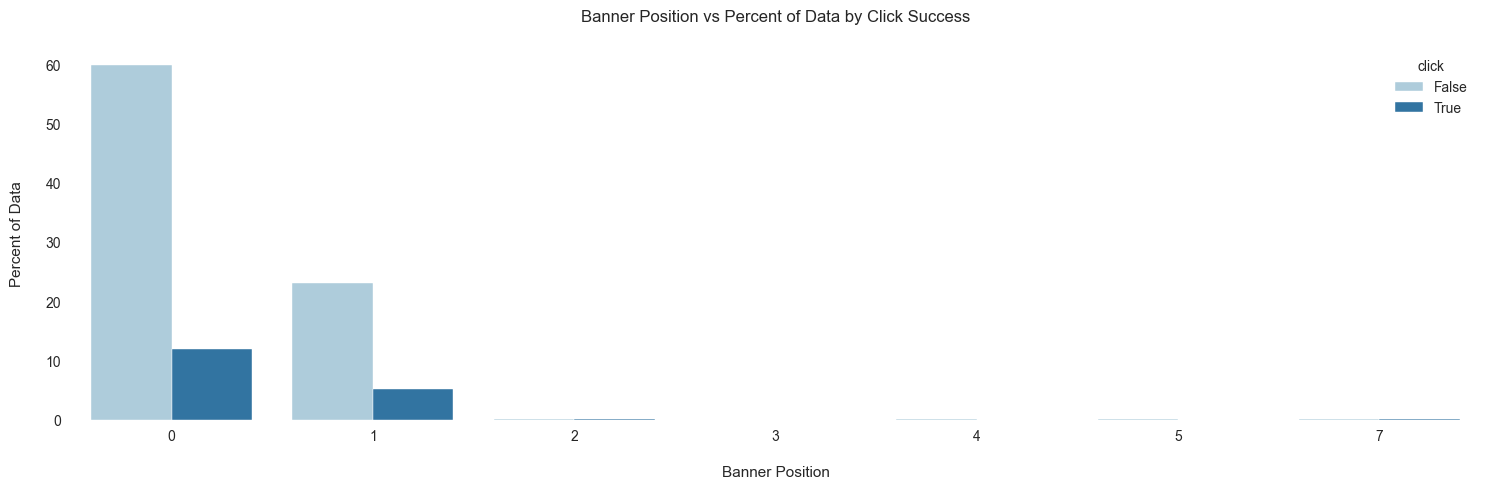

In [135]:
# Banner Position
counter=4
x = list(col_dict1.keys())[counter]
plt.figure(figsize=(15,5))
df_chart = (round(100*crd[[x,"click"]].value_counts(normalize=True),2).reset_index()).sort_values(by=[x,"click"])
res[counter] = sns.barplot(df_chart,x=x,y=0,hue="click",palette="Paired")
res[counter].set_xlabel("\n"+col_dict1[x][0])
res[counter].set_ylabel("Percent of Data\n")
res[counter].set_title(col_dict1[x][0]+" vs Percent of Data by Click Success\n")

plt.setp(res[counter].xaxis.get_majorticklabels(),fontsize=10)
plt.tight_layout()
plt.savefig("02 - Banner Position Analysis.jpeg",dpi=400, bbox_inches='tight')
plt.show()

In [136]:
#site_id
func_stats(crd)[func_stats(crd)["Column"]=="site_id"]

,Column,Type,NumOfUniqueValues,PercentUnqOfTotal,MostAppearing,MostAppearing%
3,site_id,object,1485,1.49,85f751fd,36.02236


##### We wont be able to plot a chart for site_id, as there are too many unique values here. The top most appearing site id represents 36% of data.

In [137]:
#site_domain
func_stats(crd)[func_stats(crd)["Column"]=="site_domain"]

,Column,Type,NumOfUniqueValues,PercentUnqOfTotal,MostAppearing,MostAppearing%
4,site_domain,object,1331,1.33,c4e18dd6,37.362374


##### Same is the case with site_domain, too many unique values. the top most appearing site_domain represents around 37% of data

In [138]:
#site_domain
func_stats(crd)[func_stats(crd)["Column"]=="site_category"]

,Column,Type,NumOfUniqueValues,PercentUnqOfTotal,MostAppearing,MostAppearing%
5,site_category,object,19,0.02,50e219e0,40.839408


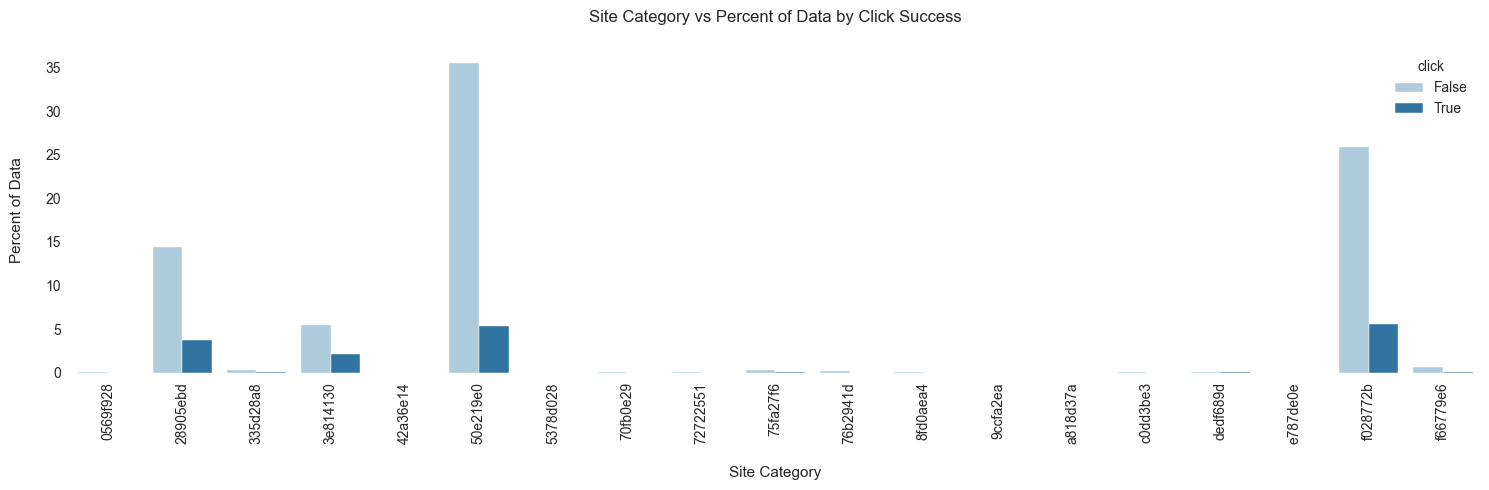

In [139]:
#Site Category
counter=7
x = list(col_dict1.keys())[counter]
plt.figure(figsize=(15,5))
df_chart = (round(100*crd[[x,"click"]].value_counts(normalize=True),2).reset_index()).sort_values(by=[x,"click"])
res[counter] = sns.barplot(df_chart,x=x,y=0,hue="click",palette="Paired")
res[counter].set_xlabel("\n"+col_dict1[x][0])
res[counter].set_ylabel("Percent of Data\n")
res[counter].set_title(col_dict1[x][0]+" vs Percent of Data by Click Success\n")

plt.setp(res[counter].xaxis.get_majorticklabels(),fontsize=10,rotation=90)
plt.tight_layout()
plt.savefig("03 - Site Category Analysis.jpeg",dpi=400, bbox_inches='tight')
plt.show()

In [140]:
#App Id
func_stats(crd)[func_stats(crd)["Column"]=="app_id"]

,Column,Type,NumOfUniqueValues,PercentUnqOfTotal,MostAppearing,MostAppearing%
6,app_id,object,1354,1.35,ecad2386,63.97764


##### app_id also has too many values, with the top most appearing app id representing 64% of the data

In [141]:
#App Domain
func_stats(crd)[func_stats(crd)["Column"]=="app_domain"]

,Column,Type,NumOfUniqueValues,PercentUnqOfTotal,MostAppearing,MostAppearing%
7,app_domain,object,96,0.1,7801e8d9,67.464675


#### app_domain also has high unique values (96), with the top most app domain representing around 67% of the data. We will quickly plot a small chart for this.

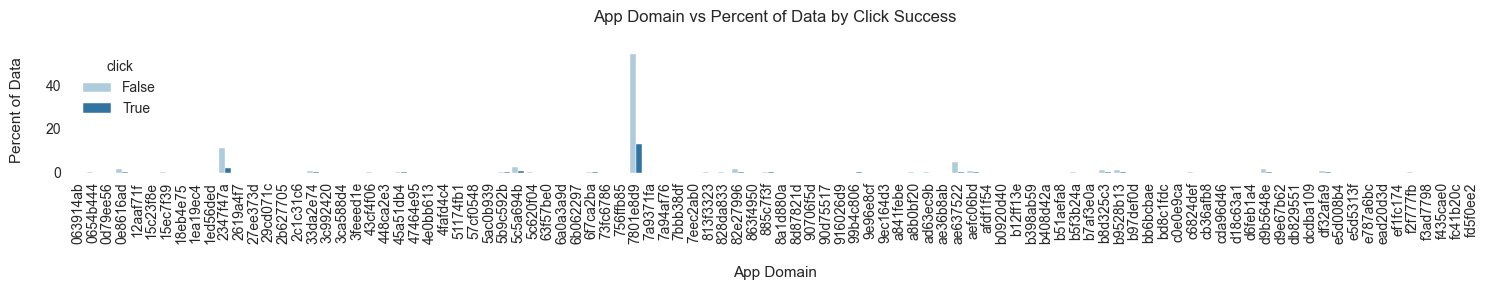

In [142]:
#App Domain
counter=9
x = list(col_dict1.keys())[counter]
plt.figure(figsize=(15,3))
df_chart = (round(100*crd[[x,"click"]].value_counts(normalize=True),2).reset_index()).sort_values(by=[x,"click"])
res[counter] = sns.barplot(df_chart,x=x,y=0,hue="click",palette="Paired")
res[counter].set_xlabel("\n"+col_dict1[x][0])
res[counter].set_ylabel("Percent of Data\n")
res[counter].set_title(col_dict1[x][0]+" vs Percent of Data by Click Success\n")

plt.setp(res[counter].xaxis.get_majorticklabels(),fontsize=10,rotation=90)
plt.tight_layout()
plt.show()

In [143]:
#App Category
func_stats(crd)[func_stats(crd)["Column"]=="app_category"]

,Column,Type,NumOfUniqueValues,PercentUnqOfTotal,MostAppearing,MostAppearing%
8,app_category,object,21,0.02,07d7df22,64.769648


#### From the chart below you can see that mostly 5 major app categories account for almost all of the data

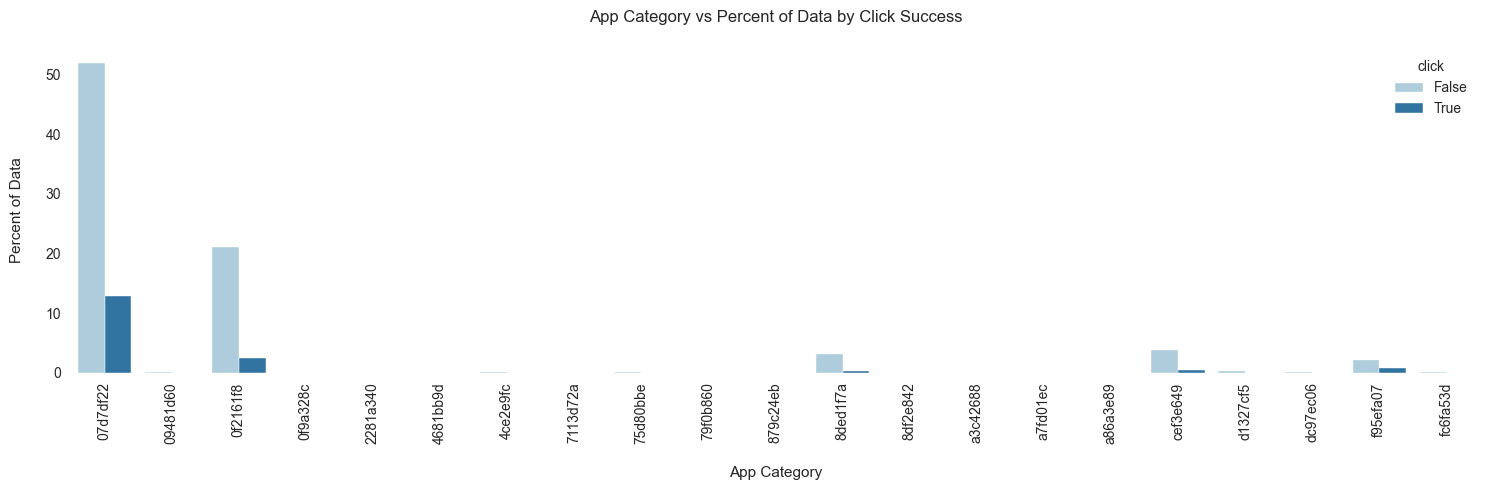

In [144]:
#App Category
counter=10
x = list(col_dict1.keys())[counter]
plt.figure(figsize=(15,5))
df_chart = (round(100*crd[[x,"click"]].value_counts(normalize=True),2).reset_index()).sort_values(by=[x,"click"])
res[counter] = sns.barplot(df_chart,x=x,y=0,hue="click",palette="Paired")
res[counter].set_xlabel("\n"+col_dict1[x][0])
res[counter].set_ylabel("Percent of Data\n")
res[counter].set_title(col_dict1[x][0]+" vs Percent of Data by Click Success\n")

plt.setp(res[counter].xaxis.get_majorticklabels(),fontsize=10,rotation=90)
plt.tight_layout()
plt.savefig("04 - App Category Analysis.jpeg",dpi=400, bbox_inches='tight')
plt.show()


In [145]:
#Device ID
func_stats(crd)[func_stats(crd)["Column"]=="device_id"]

,Column,Type,NumOfUniqueValues,PercentUnqOfTotal,MostAppearing,MostAppearing%
9,device_id,object,16801,16.8,a99f214a,82.579826


##### Too many unique device ids, with most of the data (82.5%) being represented by 1 device id

In [146]:
#Device IP
func_stats(crd)[func_stats(crd)["Column"]=="device_ip"]

,Column,Type,NumOfUniqueValues,PercentUnqOfTotal,MostAppearing,MostAppearing%
10,device_ip,object,78013,78.01,6b9769f2,0.521005


##### I doubt this column has anything to contribute to the data as there are so many unique values. of 99,999 rows, there are 78,013 unqiue values for device_ip.
##### I might decide to drop this column

In [147]:
#Device Model
func_stats(crd)[func_stats(crd)["Column"]=="device_model"]

,Column,Type,NumOfUniqueValues,PercentUnqOfTotal,MostAppearing,MostAppearing%
11,device_model,object,3145,3.15,8a4875bd,6.04106


##### Too many unique values of device model. Interesting thing is that the 3145 unique device_models, none of the models seem to be representing the data at all. The top most appearing device model represents only 6% of data.
##### I might get rid of this column as well.

In [148]:
#Device Type
func_stats(crd)[func_stats(crd)["Column"]=="device_type"]

,Column,Type,NumOfUniqueValues,PercentUnqOfTotal,MostAppearing,MostAppearing%
12,device_type,int64,4,0.0,1,92.239922


##### One device model represents 92% of all the data. Lets also look at the spread of other device types

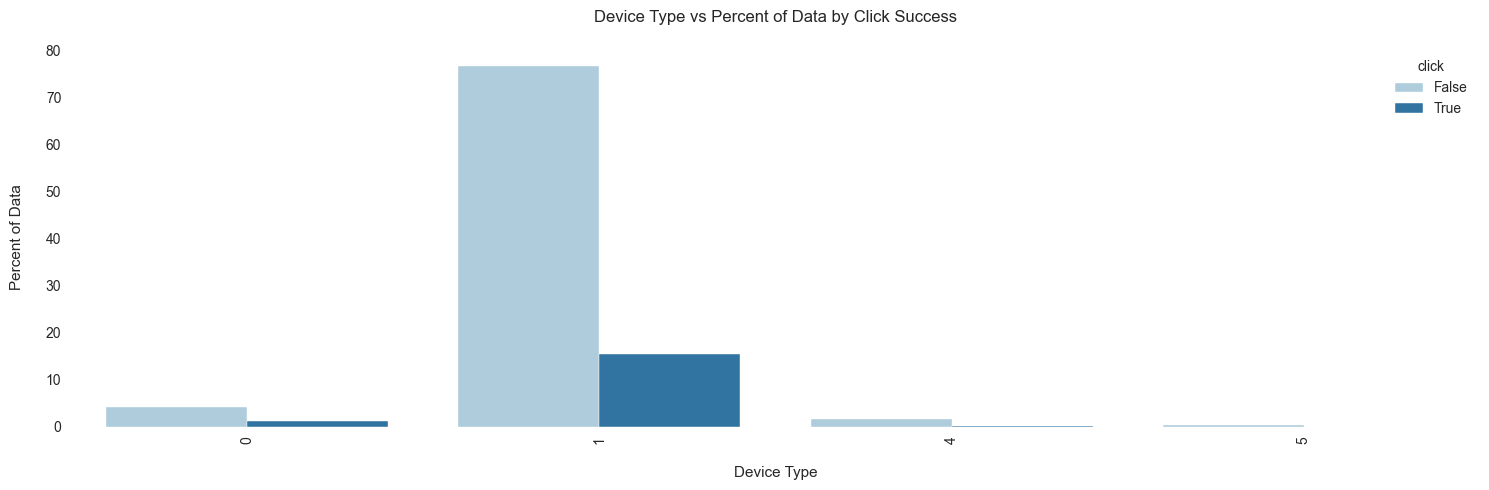

In [149]:
#Device Type
counter=14
x = list(col_dict1.keys())[counter]
plt.figure(figsize=(15,5))
df_chart = (round(100*crd[[x,"click"]].value_counts(normalize=True),2).reset_index()).sort_values(by=[x,"click"])
res[counter] = sns.barplot(df_chart,x=x,y=0,hue="click",palette="Paired")
res[counter].set_xlabel("\n"+col_dict1[x][0])
res[counter].set_ylabel("Percent of Data\n")
res[counter].set_title(col_dict1[x][0]+" vs Percent of Data by Click Success\n")

plt.setp(res[counter].xaxis.get_majorticklabels(),fontsize=10,rotation=90)
plt.tight_layout()
plt.savefig("05 - Device Type Analysis.jpeg",dpi=400, bbox_inches='tight')
plt.show()


In [150]:
#Device Connection Type
func_stats(crd)[func_stats(crd)["Column"]=="device_conn_type"]

,Column,Type,NumOfUniqueValues,PercentUnqOfTotal,MostAppearing,MostAppearing%
13,device_conn_type,int64,4,0.0,0,86.413864


##### 1 Device Connection Type represents 86% of data, with the next best around 10-12%

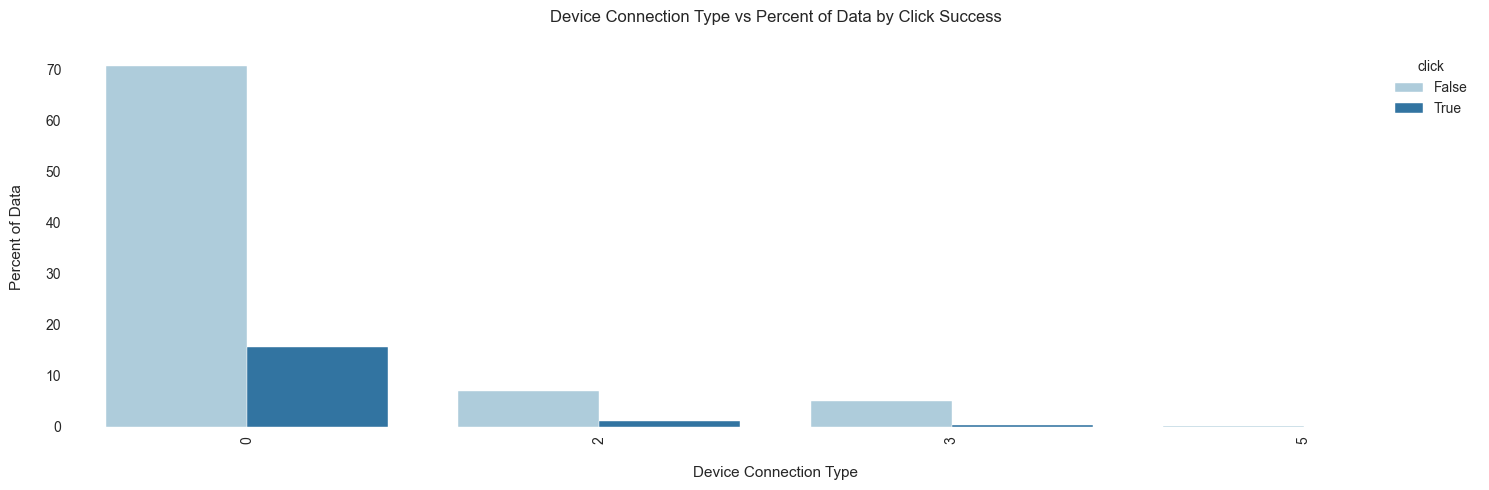

In [151]:
#Device Connection Type
counter=15
x = list(col_dict1.keys())[counter]
plt.figure(figsize=(15,5))
df_chart = (round(100*crd[[x,"click"]].value_counts(normalize=True),2).reset_index()).sort_values(by=[x,"click"])
res[counter] = sns.barplot(df_chart,x=x,y=0,hue="click",palette="Paired")
res[counter].set_xlabel("\n"+col_dict1[x][0])
res[counter].set_ylabel("Percent of Data\n")
res[counter].set_title(col_dict1[x][0]+" vs Percent of Data by Click Success\n")

plt.setp(res[counter].xaxis.get_majorticklabels(),fontsize=10,rotation=90)
plt.tight_layout()
plt.savefig("06 - Device Connection Type Analysis.jpeg",dpi=400, bbox_inches='tight')
plt.show()


In [152]:
#"C" Columns
func_stats(crd)[func_stats(crd)["Column"].isin(["C1","C14","C15","C16","C17","C18","C19","C20","C21"])].sort_values(by="Column",ascending=True)

,Column,Type,NumOfUniqueValues,PercentUnqOfTotal,MostAppearing,MostAppearing%
1,C1,int64,7,0.01,1005,91.862919
14,C14,int64,1722,1.72,4687,2.306023
15,C15,int64,8,0.01,320,93.136931
16,C16,int64,9,0.01,50,94.209942
17,C17,int64,399,0.4,1722,10.99111
18,C18,int64,4,0.0,0,41.659417
19,C19,int64,64,0.06,35,29.935299
20,C20,int64,154,0.15,-1,46.767468
21,C21,int64,60,0.06,23,22.096221


##### C1, C15, C16 seem to have fewer categories and their top most appearing category represents over 90% of data. We will plot data for these columns.
##### C18 has only 4 categories and the top most representing 41% of data. This column may have an even spread. We will plot the data for this.
##### C14, C17, C19, C20 and C21 All seem to have high number of unique values and we wont be able to properly plot them.
##### C14 data is very spread and all categories represent very little data
##### C17 top most category represents only 10% of data, so again a bit spread out
##### C19, C20 and C21 has fewer unique values compared to other "C" columns, with their top most category representing between 20-45% of data.

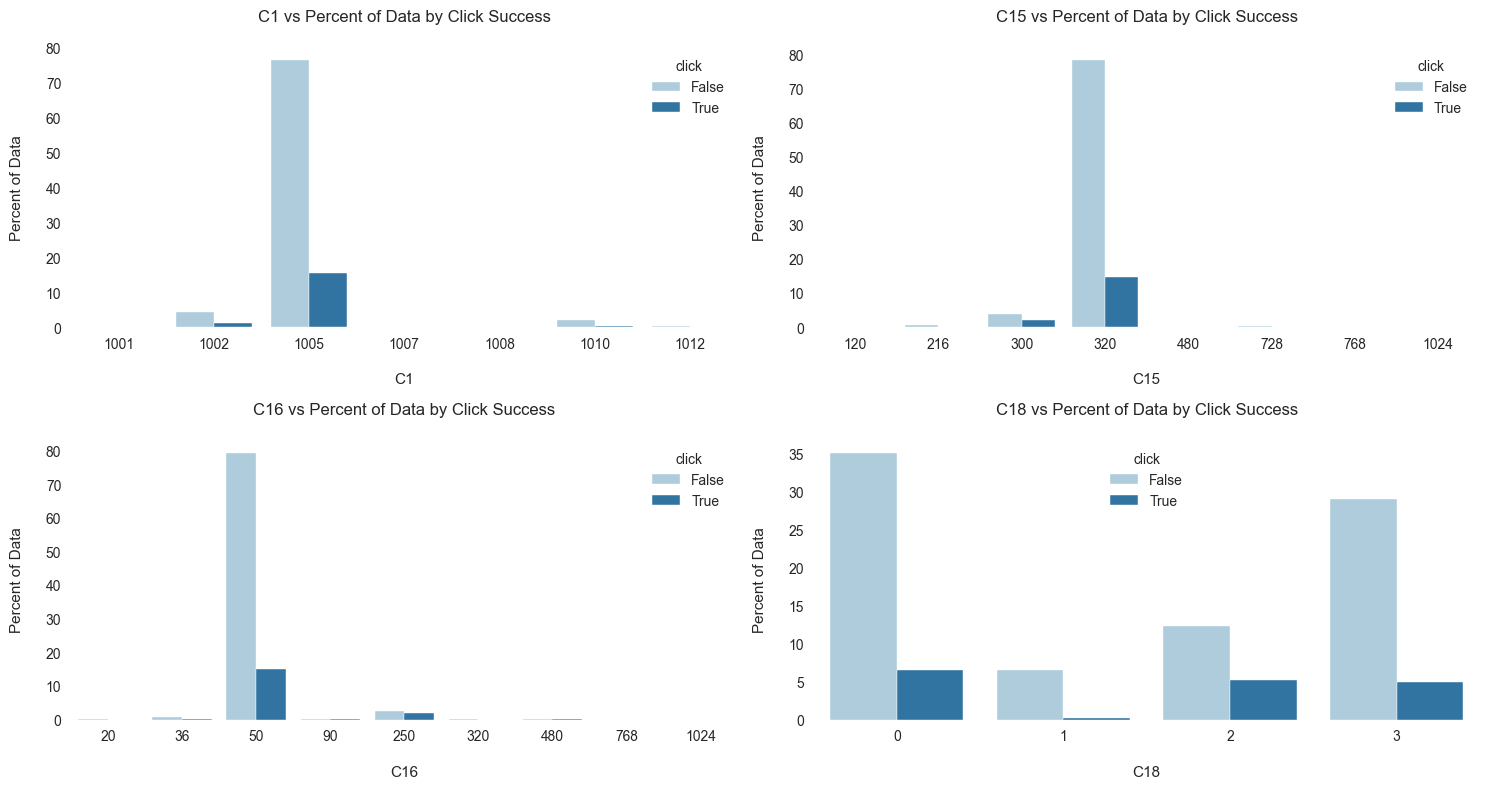

In [153]:
#"C" Columns - C1, C15, C16, C18
fig,axs = plt.subplots(2,2,figsize=(15,8))
counter=16
x = list(col_dict1.keys())[counter]
df_chart = (round(100*crd[[x,"click"]].value_counts(normalize=True),2).reset_index()).sort_values(by=[x,"click"])
res[counter] = sns.barplot(df_chart,x=x,y=0,hue="click",palette="Paired",ax=axs[0,0])
res[counter].set_xlabel("\n"+col_dict1[x][0])
res[counter].set_ylabel("Percent of Data\n")
res[counter].set_title(col_dict1[x][0]+" vs Percent of Data by Click Success\n")
plt.setp(res[counter].xaxis.get_majorticklabels(),fontsize=10)


counter=18
x = list(col_dict1.keys())[counter]
df_chart = (round(100*crd[[x,"click"]].value_counts(normalize=True),2).reset_index()).sort_values(by=[x,"click"])
res[counter] = sns.barplot(df_chart,x=x,y=0,hue="click",palette="Paired",ax=axs[0,1])
res[counter].set_xlabel("\n"+col_dict1[x][0])
res[counter].set_ylabel("Percent of Data\n")
res[counter].set_title(col_dict1[x][0]+" vs Percent of Data by Click Success\n")
sns.move_legend(res[counter],"upper right")

plt.setp(res[counter].xaxis.get_majorticklabels(),fontsize=10)

counter=19
x = list(col_dict1.keys())[counter]
df_chart = (round(100*crd[[x,"click"]].value_counts(normalize=True),2).reset_index()).sort_values(by=[x,"click"])
res[counter] = sns.barplot(df_chart,x=x,y=0,hue="click",palette="Paired",ax=axs[1,0])
res[counter].set_xlabel("\n"+col_dict1[x][0])
res[counter].set_ylabel("Percent of Data\n")
res[counter].set_title(col_dict1[x][0]+" vs Percent of Data by Click Success\n")

plt.setp(res[counter].xaxis.get_majorticklabels(),fontsize=10)

counter=21
x = list(col_dict1.keys())[counter]
df_chart = (round(100*crd[[x,"click"]].value_counts(normalize=True),2).reset_index()).sort_values(by=[x,"click"])
res[counter] = sns.barplot(df_chart,x=x,y=0,hue="click",palette="Paired",ax=axs[1,1])
res[counter].set_xlabel("\n"+col_dict1[x][0])
res[counter].set_ylabel("Percent of Data\n")
res[counter].set_title(col_dict1[x][0]+" vs Percent of Data by Click Success\n")

plt.setp(res[counter].xaxis.get_majorticklabels(),fontsize=10)

plt.tight_layout()
plt.savefig("07 - C Column Analysis.jpeg",dpi=400, bbox_inches='tight')
plt.show()

##### As mentioned above C18 has bit more spread of data representation compared to C1, C15 and C16

#### Lets look at the stats of the data again

In [154]:
#Stats
func_stats(crd).sort_values(by="NumOfUniqueValues",ascending=False)

,Column,Type,NumOfUniqueValues,PercentUnqOfTotal,MostAppearing,MostAppearing%
10,device_ip,object,78013,78.01,6b9769f2,0.521005
9,device_id,object,16801,16.8,a99f214a,82.579826
11,device_model,object,3145,3.15,8a4875bd,6.04106
14,C14,int64,1722,1.72,4687,2.306023
3,site_id,object,1485,1.49,85f751fd,36.02236
6,app_id,object,1354,1.35,ecad2386,63.97764
4,site_domain,object,1331,1.33,c4e18dd6,37.362374
17,C17,int64,399,0.4,1722,10.99111
20,C20,int64,154,0.15,-1,46.767468
7,app_domain,object,96,0.1,7801e8d9,67.464675


### Calculate Click Rate

In [155]:
df_chart = crd.groupby(by=["dayofweek","hour"])[["click"]].agg(['sum','count']).reset_index()
df_chart.columns = ["dayofweek","hour","click_sum","clickcount"]
df_chart['clickrate']=df_chart.click_sum/df_chart.clickcount
df_chart
df_chart

,dayofweek,hour,click_sum,clickcount,clickrate
0,0,0,19,140,0.135714
1,0,1,43,195,0.220513
2,0,2,41,203,0.201970
3,0,3,41,277,0.148014
4,0,4,68,335,0.202985
...,...,...,...,...,...
163,6,19,44,274,0.160584
164,6,20,32,247,0.129555
165,6,21,32,204,0.156863
166,6,22,25,190,0.131579


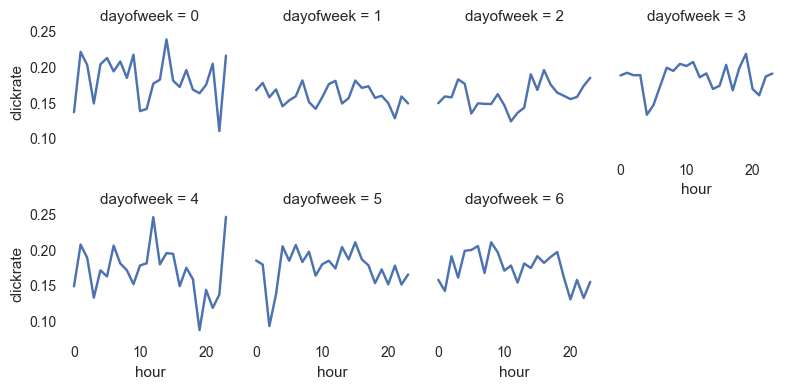

In [156]:
res1 = sns.FacetGrid(df_chart, col="dayofweek", col_wrap=4, height=2)
res1.map(sns.lineplot, "hour", "clickrate")
plt.show()

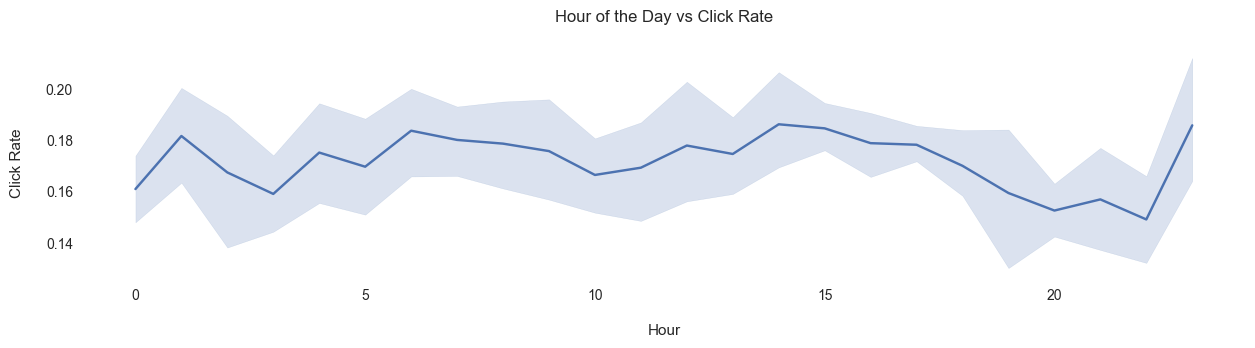

In [157]:
plt.figure(figsize=(15,3))
res2 = sns.lineplot(data =df_chart, x='hour', y='clickrate')
res2.set_xlabel("\n"+"Hour")
res2.set_ylabel("Click Rate\n")
res2.set_title("Hour of the Day"+" vs Click Rate\n")
plt.show()

In [158]:
dict_df = pd.read_csv("Data+Description+-+Sheet1.csv")
dict_df

,Variable,Description
0,click:,0/1 for non-click/click
1,"hour: format is YYMMDDHH, so 14091123 means 23...",NaN
2,C1,anonymized categorical variable
3,banner_pos,position of the ad/banner on the page
4,site_id,unique id of the site on which the ad is shown
5,site_domain,unique domain of the site on which the ad is s...
6,site_category,category of the site on which the ad is shown
7,app_id,app id of the site on which the ad is shown
8,app_domain,app category of the site on which the ad is shown
9,app_category,category id of the site on which the ad is shown


# <font color="#306EFF">Feature Engineering</font>

### Let's find out if we can handle the data in columns with string data properly

In [159]:
crd_top5 = pd.DataFrame(columns=["Column","MostAppearingValue","Percentage","Col_Mean","Col_Max","Col_Min","ColRepresentationOfData","Col_UniqueValues"])
for x in col_dict1.keys():
    crd_norm = crd.groupby([x])["y"].agg(["count"]).reset_index()
    crd_norm['count']=100*crd_norm['count'] / crd_norm['count'].sum()
    crd_norm.sort_values(by="count",ascending=False,inplace=True)
    crd_norm["column_mean"] = pd.NA
    crd_norm["column_mean"].fillna(crd_norm['count'].mean(),inplace=True)
    crd_norm["column_max"] = pd.NA
    crd_norm["column_max"].fillna(crd_norm['count'].max(),inplace=True)
    crd_norm["column_min"] = pd.NA
    crd_norm["column_min"].fillna(crd_norm['count'].min(),inplace=True)
    crd_norm["Column"] = pd.NA
    crd_norm["Column"].fillna(x,inplace=True)
    crd_norm["ColRepresentationOfData"] = pd.NA
    crd_norm["ColRepresentationOfData"].fillna(crd_norm.head(5)["count"].sum(),inplace=True)
    crd_norm["Col_UniqueValues"] = pd.NA
    crd_norm["Col_UniqueValues"].fillna(crd[x].unique().size,inplace=True)
    crd_norm.columns = ["MostAppearingValue","Percentage","Col_Mean","Col_Max","Col_Min","Column","ColRepresentationOfData","Col_UniqueValues"]
    crd_norm = crd_norm[["Column","MostAppearingValue","Percentage","Col_Mean","Col_Max","Col_Min","ColRepresentationOfData","Col_UniqueValues"]]

    crd_top5 = crd_top5.append(crd_norm.head(5))

crd_top5

,Column,MostAppearingValue,Percentage,Col_Mean,Col_Max,Col_Min,ColRepresentationOfData,Col_UniqueValues
13,hour,13,5.905059,4.166667,5.905059,2.00502,27.940279,24
9,hour,9,5.659057,4.166667,5.905059,2.00502,27.940279,24
12,hour,12,5.638056,4.166667,5.905059,2.00502,27.940279,24
14,hour,14,5.393054,4.166667,5.905059,2.00502,27.940279,24
10,hour,10,5.345053,4.166667,5.905059,2.00502,27.940279,24
...,...,...,...,...,...,...,...,...
6,C21,23,22.096221,1.666667,22.096221,0.00200,56.324563,60
54,C21,221,12.352124,1.666667,22.096221,0.00200,56.324563,60
22,C21,79,11.227112,1.666667,22.096221,0.00200,56.324563,60
13,C21,48,5.381054,1.666667,22.096221,0.00200,56.324563,60


#### Based on the above we can see that for some columns, some values represent over 90% of the data.
#### For some the top 5 categories/values represent 80% of the data but have high unique values
#### We will replace the rest of the 20% of the remaining data in these columns with the top 5 categories/columns in the same proportion as they are right now

In [160]:
crd_top1 = (crd_top5.groupby('Column').nth(0)).reset_index().sort_values(by="ColRepresentationOfData",ascending=False)

crd_top1_A80 = crd_top1[((crd_top1.ColRepresentationOfData>=80))]
crd_top1_A80_HUNQ_cols = crd_top1_A80[crd_top1_A80.Col_UniqueValues>10].Column.to_list()
print("crd_top1_A80_HUNQ_cols",crd_top1_A80_HUNQ_cols)

crd_top1_A80_HUNQ = crd_top5[["Column","MostAppearingValue","Percentage"]][crd_top5.Column.isin(crd_top1_A80_HUNQ_cols)]
display(crd_top1_A80_HUNQ)

crd_top1_A80_HUNQ_cols ['app_category', 'site_category', 'app_domain', 'device_id']


,Column,MostAppearingValue,Percentage
5,site_category,50e219e0,40.839408
17,site_category,f028772b,31.408314
1,site_category,28905ebd,18.107181
3,site_category,3e814130,7.668077
18,site_category,f66779e6,0.634006
38,app_domain,7801e8d9,67.464675
10,app_domain,2347f47a,12.893129
60,app_domain,ae637522,4.701047
30,app_domain,5c5a694b,2.850029
45,app_domain,82e27996,1.889019


In [161]:
crd_drop_cols = sorted(set(crd_top1[crd_top1.ColRepresentationOfData<80].Column.to_list()) - set(["day","hour","C14","C17","C19","C20","C21"]))
len(crd_drop_cols),crd_drop_cols

(5, ['app_id', 'device_ip', 'device_model', 'site_domain', 'site_id'])

In [162]:
crd_top1[crd_top1.Column.isin(crd_drop_cols)].sort_values(by="Col_UniqueValues",ascending=False)

,Column,MostAppearingValue,Percentage,Col_Mean,Col_Max,Col_Min,ColRepresentationOfData,Col_UniqueValues
17,device_ip,6b9769f2,0.521005,0.001282,0.521005,0.001,1.547015,78013
18,device_model,8a4875bd,6.041060,0.031797,6.041060,0.001,16.482165,3145
24,site_id,85f751fd,36.022360,0.067340,36.022360,0.001,63.162632,1485
11,app_id,ecad2386,63.977640,0.073855,63.977640,0.001,74.446744,1354
23,site_domain,c4e18dd6,37.362374,0.075131,37.362374,0.001,67.180672,1331


In [163]:
import itertools
col_list=list(itertools.product(["app_domain","app_category","site_category","device_id"],["MostAppearingValue","Percentage"]))
df_analysis = pd.concat([crd_top1_A80_HUNQ[["MostAppearingValue","Percentage"]][crd_top1_A80_HUNQ.Column=="app_domain"].reset_index().drop(columns=["index"]),
           crd_top1_A80_HUNQ[["MostAppearingValue","Percentage"]][crd_top1_A80_HUNQ.Column=="app_category"].reset_index().drop(columns=["index"]),
           crd_top1_A80_HUNQ[["MostAppearingValue","Percentage"]][crd_top1_A80_HUNQ.Column=="site_category"].reset_index().drop(columns=["index"]),
           crd_top1_A80_HUNQ[["MostAppearingValue","Percentage"]][crd_top1_A80_HUNQ.Column=="device_id"].reset_index().drop(columns=["index"])],axis=1)
df_analysis.columns = pd.MultiIndex.from_tuples(col_list)
df_analysis.columns.names = ["Column","Values"]
df_analysis

Column         app_domain                  app_category             \
Values MostAppearingValue Percentage MostAppearingValue Percentage   
0                7801e8d9  67.464675           07d7df22  64.769648   
1                2347f47a  12.893129           0f2161f8  23.644236   
2                ae637522   4.701047           cef3e649   4.300043   
3                5c5a694b   2.850029           8ded1f7a   3.519035   
4                82e27996   1.889019           f95efa07   2.868029   

Column      site_category                     device_id             
Values MostAppearingValue Percentage MostAppearingValue Percentage  
0                50e219e0  40.839408           a99f214a  82.579826  
1                f028772b  31.408314           c357dbff   0.062001  
2                28905ebd  18.107181           0f7c61dc   0.051001  
3                3e814130   7.668077           afeffc18   0.034000  
4                f66779e6   0.634006           936e92fb   0.027000

## Lets make a copy of the main Dataframe. crd2 will be our DF that we work from here on.

In [164]:
crd2 = crd.copy()

### Here we replace the 20% of the data that is not represented by the top 5 ctaegories with these in the current proportion

In [165]:
print(dt.datetime.now())
for col in crd_top1_A80_HUNQ_cols:
    print(col,"\n")
    values_not_to_replace = crd_top1_A80_HUNQ["MostAppearingValue"][crd_top1_A80_HUNQ.Column ==col].to_list()

    num_of_rows_to_replace = list(np.round(crd2[col][~crd2.site_category.isin(crd_top1_A80_HUNQ["MostAppearingValue"][crd_top1_A80_HUNQ.Column ==col].to_list())].size*((crd_top1_A80_HUNQ["Percentage"][crd_top1_A80_HUNQ.Column ==col] +((100 - crd_top1_A80_HUNQ["Percentage"][crd_top1_A80_HUNQ.Column ==col].sum())/5)).to_numpy()/100)))

    values_to_replace = crd2[col][~crd2.site_category.isin(crd_top1_A80_HUNQ["MostAppearingValue"][crd_top1_A80_HUNQ.Column ==col].to_list())].to_list()

    for n,v in list(zip(num_of_rows_to_replace,values_not_to_replace)):
        for i,k in list(zip(range(int(n)),(crd2[col][~(crd2[col].isin(values_not_to_replace))]).iloc[:int(n)].index.to_list())):
            crd2[col].loc[k] = v
            #print(i,n,x,crd2["site_category"].loc[k])
print(dt.datetime.now())

2022-11-15 13:42:54.025346
app_category 

site_category 

app_domain 

device_id 

2022-11-15 13:43:16.043231


In [166]:
col_list=list(itertools.product(["app_domain","app_category","site_category","device_id"],["MostAppearingValue","Percentage"]))
df_analysis = pd.concat([(100*crd2[["app_domain"]].value_counts(normalize=True)).reset_index(),
                         (100*crd2[["app_category"]].value_counts(normalize=True)).reset_index(),
                         (100*crd2[["site_category"]].value_counts(normalize=True)).reset_index(),
                         (100*crd2[["device_id"]].value_counts(normalize=True)).reset_index()],axis=1)
df_analysis.columns = pd.MultiIndex.from_tuples(col_list)
df_analysis.columns.names = ["Column","Values"]
df_analysis
#(100*crd2[["app_domain"]].value_counts(normalize=True)).reset_index()

Column         app_domain                  app_category             \
Values MostAppearingValue Percentage MostAppearingValue Percentage   
0                7801e8d9  77.666777           07d7df22  65.668657   
1                2347f47a  12.893129           0f2161f8  23.644236   
2                ae637522   4.701047           cef3e649   4.300043   
3                5c5a694b   2.850029           8ded1f7a   3.519035   
4                82e27996   1.889019           f95efa07   2.868029   

Column      site_category                     device_id             
Values MostAppearingValue Percentage MostAppearingValue Percentage  
0                50e219e0  41.391414           a99f214a  99.825998  
1                f028772b  31.833318           c357dbff   0.062001  
2                28905ebd  18.354184           0f7c61dc   0.051001  
3                3e814130   7.775078           afeffc18   0.034000  
4                f66779e6   0.646006           936e92fb   0.027000

### We have been able to keep the proportions similar after this feature engineering.

#### Replace unique string values with 0,1,2,3,4

In [167]:
for x in crd_top1_A80_HUNQ_cols:
    crd2[x].replace(to_replace=crd2[x].value_counts().reset_index()["index"].to_list(),value=[0,1,2,3,4],inplace=True)

In [168]:
col_list=list(itertools.product(["app_domain","app_category","site_category","device_id"],["MostAppearingValue","Percentage"]))
df_analysis = pd.concat([(100*crd2[["app_domain"]].value_counts(normalize=True)).reset_index(),
                         (100*crd2[["app_category"]].value_counts(normalize=True)).reset_index(),
                         (100*crd2[["site_category"]].value_counts(normalize=True)).reset_index(),
                         (100*crd2[["device_id"]].value_counts(normalize=True)).reset_index()],axis=1)
df_analysis.columns = pd.MultiIndex.from_tuples(col_list)
df_analysis.columns.names = ["Column","Values"]
df_analysis

Column         app_domain                  app_category             \
Values MostAppearingValue Percentage MostAppearingValue Percentage   
0                       0  77.666777                  0  65.668657   
1                       1  12.893129                  1  23.644236   
2                       2   4.701047                  2   4.300043   
3                       3   2.850029                  3   3.519035   
4                       4   1.889019                  4   2.868029   

Column      site_category                     device_id             
Values MostAppearingValue Percentage MostAppearingValue Percentage  
0                       0  41.391414                  0  99.825998  
1                       1  31.833318                  1   0.062001  
2                       2  18.354184                  2   0.051001  
3                       3   7.775078                  3   0.034000  
4                       4   0.646006                  4   0.027000

### We will drop 5 columns as they have too many unique values and none of them represent the data as much.
['app_id', 'device_ip', 'device_model', 'site_domain', 'site_id']

In [169]:
crd2.drop(columns=crd_drop_cols,inplace=True)
crd2.head()

,click,C1,banner_pos,site_category,app_domain,app_category,device_id,device_type,device_conn_type,C14,...,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
0,False,1005,1,1,0,0,0,1,0,22683,...,2528,0,39,100075,221,10,1,28,14,0
1,True,1005,1,1,0,0,0,1,0,17037,...,1934,2,39,-1,16,10,2,22,19,1
2,False,1005,0,2,0,0,0,1,0,22155,...,2552,3,167,100202,23,10,3,23,18,0
3,False,1002,0,0,0,0,0,0,0,21591,...,2478,3,167,100074,23,10,2,22,19,0
4,True,1005,0,2,0,0,0,1,0,15708,...,1722,0,35,-1,79,10,1,21,8,1


### Month has 1 single unique value - 10, so we will remove this columns
### click is the same as the target variable y. We will remove click as well
### From here on our target variable is always y

In [170]:
crd2.drop(columns=["month","click"],inplace=True)

In [171]:
crd2.head()

,C1,banner_pos,site_category,app_domain,app_category,device_id,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,dayofweek,day,hour,y
0,1005,1,1,0,0,0,1,0,22683,320,50,2528,0,39,100075,221,1,28,14,0
1,1005,1,1,0,0,0,1,0,17037,320,50,1934,2,39,-1,16,2,22,19,1
2,1005,0,2,0,0,0,1,0,22155,320,50,2552,3,167,100202,23,3,23,18,0
3,1002,0,0,0,0,0,0,0,21591,320,50,2478,3,167,100074,23,2,22,19,0
4,1005,0,2,0,0,0,1,0,15708,320,50,1722,0,35,-1,79,1,21,8,1


# <font color="#306EFF">Train and Test</font>

## Make Training and Test Data

In [172]:
y = crd2.y
X = crd2.drop(columns=["y"],axis=1)
X.shape,y.shape

((99999, 19), (99999,))

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=42,stratify=y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((69999, 19), (30000, 19), (69999,), (30000,))

In [174]:
X_train.columns

Index(['C1', 'banner_pos', 'site_category', 'app_domain', 'app_category',
       'device_id', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16',
       'C17', 'C18', 'C19', 'C20', 'C21', 'dayofweek', 'day', 'hour'],
      dtype='object')

# <font color="#306EFF">Scaling</font>

In [175]:
std = StandardScaler()
X_train[X_train.columns] = std.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = std.transform(X_test[X_test.columns])

In [176]:
X_train.columns,X_test.columns

(Index(['C1', 'banner_pos', 'site_category', 'app_domain', 'app_category',
        'device_id', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16',
        'C17', 'C18', 'C19', 'C20', 'C21', 'dayofweek', 'day', 'hour'],
       dtype='object'),
 Index(['C1', 'banner_pos', 'site_category', 'app_domain', 'app_category',
        'device_id', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16',
        'C17', 'C18', 'C19', 'C20', 'C21', 'dayofweek', 'day', 'hour'],
       dtype='object'))

In [177]:
X_train['device_info'] = X_train.device_type + X_train.banner_pos + X_train.device_conn_type
X_train = X_train.drop(['banner_pos','device_conn_type','device_type'],axis=1)

X_test['device_info'] = X_test.device_type + X_test.banner_pos + X_test.device_conn_type
X_test = X_test.drop(['banner_pos','device_conn_type','device_type'],axis=1)

# <font color="#306EFF">Model Building</font>

## 01 - Decision Tree Classifier

In [178]:
tree = DecisionTreeClassifier(max_depth = 10)
tree.fit(X_train,y_train)
print('Train Score:',tree.score(X_train,y_train))
print('Test Score:',tree.score(X_test,y_test))

Train Score: 0.8393119901712882
Test Score: 0.8314666666666667


In [179]:
from sklearn.metrics import roc_curve,confusion_matrix,precision_score,recall_score,roc_auc_score
y_score = tree.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])
roc_auc_score = roc_auc_score(y_test,y_score[:,1])
print(roc_auc_score)

0.6841932458348061


In [180]:
y_pred = tree.predict(X_test)
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
print("Precision: %s, Recall: %s" %(precision, recall))

Precision: 0.7858284817162359, Recall: 0.8314666666666667


In [181]:
matrix = confusion_matrix(y_test,y_pred)
tn, fp, fn, tp = matrix.ravel()
print(matrix)

[[24575   331]
 [ 4725   369]]


In [182]:
for max_depth_val in [2, 3, 5, 10, 15, 20]:
    clf = DecisionTreeClassifier(max_depth = max_depth_val)
    print("Evaluating tree with max_depth = %s" %(max_depth_val))
    y_pred = tree.fit(X_train,y_train).predict(X_test)
    print("Confusion matrix: ")
    print(confusion_matrix(y_test, y_pred))
    prec = precision_score(y_test, y_pred, average = 'weighted')
    recall = recall_score(y_test, y_pred, average = 'weighted')
    print("Precision: %s, Recall: %s" %(prec, recall))

Evaluating tree with max_depth = 2
Confusion matrix: 
[[24570   336]
 [ 4727   367]]
Precision: 0.7848930527698597, Recall: 0.8312333333333334
Evaluating tree with max_depth = 3
Confusion matrix: 
[[24573   333]
 [ 4725   369]]
Precision: 0.7855643315112085, Recall: 0.8314
Evaluating tree with max_depth = 5
Confusion matrix: 
[[24573   333]
 [ 4724   370]]
Precision: 0.7857026737064869, Recall: 0.8314333333333334
Evaluating tree with max_depth = 10
Confusion matrix: 
[[24573   333]
 [ 4724   370]]
Precision: 0.7857026737064869, Recall: 0.8314333333333334
Evaluating tree with max_depth = 15
Confusion matrix: 
[[24575   331]
 [ 4725   369]]
Precision: 0.7858284817162359, Recall: 0.8314666666666667
Evaluating tree with max_depth = 20
Confusion matrix: 
[[24574   332]
 [ 4726   368]]
Precision: 0.7855575758166747, Recall: 0.8314


In [183]:
for max_depth_val in [3, 5, 10]:
    k_fold = KFold(n_splits = 4)
    clf = DecisionTreeClassifier(max_depth = max_depth_val)
    print("Evaluating Decision Tree for max_depth = %s" %(max_depth_val))
    pred_dtree = tree.fit(X_train, y_train).predict(X_test)

    cv_precision = cross_val_score(clf, X_train, y_train, cv = k_fold, scoring = 'recall_weighted')
    precision = recall_score(y_test, pred_dtree, average = 'weighted')
    print("Cross validation Recall: %s" %(cv_precision.mean()))
    print("Test Recall: %s" %(precision.mean()))

Evaluating Decision Tree for max_depth = 3
Cross validation Recall: 0.8311261721077939
Test Recall: 0.8313
Evaluating Decision Tree for max_depth = 5
Cross validation Recall: 0.8325547745585462
Test Recall: 0.8314666666666667
Evaluating Decision Tree for max_depth = 10
Cross validation Recall: 0.8283261214926567
Test Recall: 0.8313333333333334


In [184]:
print(classification_report(y_test,pred_dtree))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     24906
           1       0.52      0.07      0.13      5094

    accuracy                           0.83     30000
   macro avg       0.68      0.53      0.52     30000
weighted avg       0.79      0.83      0.77     30000



## 02 - Random Forest Classifier

In [185]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [10],
    'n_estimators':[2,5,10,20,50],
    'min_samples_split': [2, 3, 4],
    'max_features' : ['log2']
}

rf = RandomForestClassifier(random_state=42)

rf_search = RandomizedSearchCV(estimator = rf, param_distributions=param_grid,
                               cv = 5, n_jobs = -1, verbose = 2, n_iter = 10)

model = rf_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [186]:
rf_search.best_params_

{'n_estimators': 50,
 'min_samples_split': 4,
 'max_features': 'log2',
 'max_depth': 10,
 'bootstrap': True}

In [187]:
print(dt.datetime.now())
clf_rf = RandomForestClassifier(n_estimators= 20,
                                min_samples_split= 3,
                                max_features= 'log2',
                                max_depth= 10,
                                bootstrap= True,
                                random_state=42)
print(dt.datetime.now())
clf_rf.fit(X_train,y_train)
print(dt.datetime.now())

2022-11-15 13:43:43.760689
2022-11-15 13:43:43.766181
2022-11-15 13:43:44.890683


In [188]:
rf_predict = clf_rf.predict(X_test)

print(confusion_matrix(y_test, rf_predict))
prec = precision_score(y_test, rf_predict, average = 'weighted')
recall = recall_score(y_test, rf_predict, average = 'weighted')
print("Precision: %s, Recall: %s" %(prec, recall))

[[24715   191]
 [ 4801   293]]
Precision: 0.7979538576639762, Recall: 0.8336


In [189]:
rf_prob = clf_rf.predict_proba(X_test)
rf_fpr,rf_tpr,_ = roc_curve(y_test,rf_prob[:,1])

In [190]:
print(classification_report(y_test,rf_predict))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     24906
           1       0.61      0.06      0.11      5094

    accuracy                           0.83     30000
   macro avg       0.72      0.52      0.51     30000
weighted avg       0.80      0.83      0.77     30000



## 03 - Third - Boosting


In [191]:
gbc = GradientBoostingClassifier(random_state=42).fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)
recall_gbc = round(recall_score(y_test, gbc_pred),4)
precision_gbc = round(precision_score(y_test, gbc_pred),4)

print('Recall :\t {}'.format(recall_gbc))
print('Precision :\t {}:'.format(precision_gbc))

Recall :	 0.0373
Precision :	 0.6271:


In [192]:
roc_auc_score = metrics.roc_auc_score(y_test,gbc_pred)
print(roc_auc_score)
print(gbc.score(X_test,y_test))
gbc_fpr,gbc_tpr,_ = roc_curve(y_test,gbc_pred)

0.5163808617693457
0.8327666666666667


In [193]:
# Set up k-fold
k_fold = KFold(n_splits = 5)

# Evaluate precision and recall for each fold
precision = cross_val_score(
    gbc, X_train, y_train, cv = k_fold, scoring = 'precision_weighted')
recall = cross_val_score(
    gbc, X_train, y_train, cv = k_fold, scoring = 'recall_weighted')
print("Precision scores: %s" %(precision.mean()))
print("Recall scores: %s" %(recall.mean()))
print(k_fold)

Precision scores: 0.791727502370714
Recall scores: 0.8320547549314746
KFold(n_splits=5, random_state=None, shuffle=False)


In [194]:
print(classification_report(y_test,gbc_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     24906
           1       0.63      0.04      0.07      5094

    accuracy                           0.83     30000
   macro avg       0.73      0.52      0.49     30000
weighted avg       0.80      0.83      0.77     30000



In [195]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

Text(0.5, 1.0, 'AUC-ROC Curve')

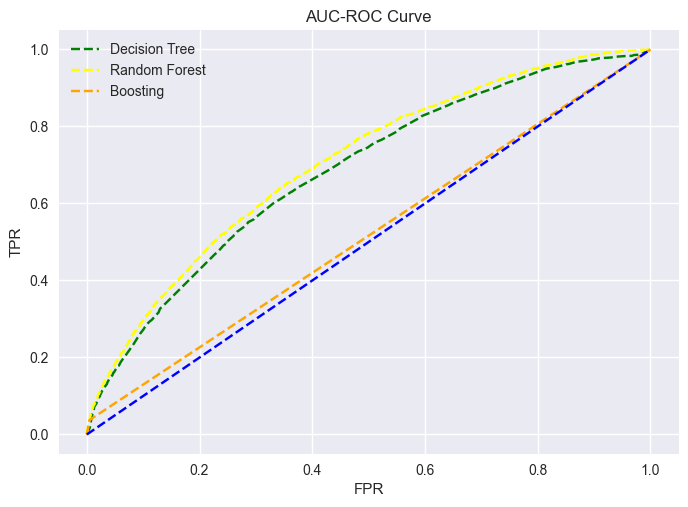

In [196]:
plt.style.use('seaborn')
plt.plot(fpr,tpr,linestyle = '--',color = 'green',label='Decision Tree')
plt.plot(rf_fpr,rf_tpr,linestyle = '--',color = 'yellow',label='Random Forest')
plt.plot(gbc_fpr,gbc_tpr,linestyle = '--',color = 'orange',label='Boosting')
plt.plot(p_fpr,p_tpr,linestyle='--',color = 'blue')
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC-ROC Curve')

In [197]:
print('Random Forest AUC-ROC',metrics.roc_auc_score(y_test,rf_predict))
print('Decision Tree',metrics.roc_auc_score(y_test,pred_dtree))
print('Gradient Boosting',metrics.roc_auc_score(y_test,gbc_pred))

Random Forest AUC-ROC 0.524924907286261
Decision Tree 0.5295718734006413
Gradient Boosting 0.5163808617693457


In [198]:
metrics.roc_auc_score(y_test,clf_rf.predict_proba(X_test)[:,1])

0.7052001627414721

## 04 - Feature Importance - Select KBest

In [199]:
# instantiate SelectKBest to determine 20 best features
best_features = SelectKBest(score_func=f_classif, k=len(X_train.columns))
fit = best_features.fit(X_train,y_train)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X_train.columns)
# concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  # name output columns

In [200]:
# Top 20 Feature Selection
print(feature_scores.nlargest(15,'Score'))

     Feature_Name        Score
7             C16  1281.076529
1   site_category   723.353208
2      app_domain   391.406928
12            C21   332.553490
5             C14   261.394092
8             C17   233.865907
11            C20   228.507951
16    device_info   195.868902
3    app_category   167.702360
0              C1   113.431723
6             C15    89.072539
4       device_id    41.674697
9             C18    36.318779
13      dayofweek    17.623060
14            day     7.216322


In [201]:
selected_feature_df = feature_scores.nlargest(15,'Score')

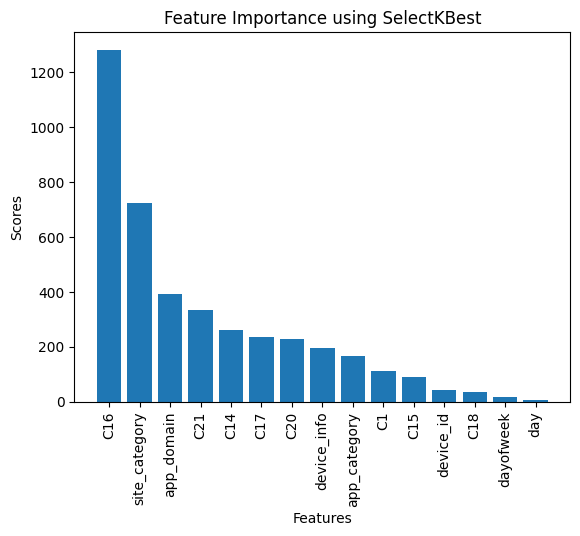

In [202]:
plt.rcdefaults()
plt.bar(selected_feature_df.Feature_Name,selected_feature_df.Score)
plt.title("Feature Importance using SelectKBest")
plt.xlabel("Features")
plt.ylabel("Scores")
plt.xticks(rotation=90)
plt.show()

In [203]:
features_selected = feature_scores.nlargest(15,'Score').Feature_Name.to_list()

In [204]:
# dropping the unwanted features
X_train = X_train[features_selected]
X_test  = X_test[features_selected]

## 05 - Principal Component Analysis

In [205]:
# initialize PCA components
pca = PCA(n_components=5)
pca.fit(X_train)
pca_X_train = pca.transform(X_train)
pca_X_test = pca.transform(X_test)
df_pca_X_train = pd.DataFrame(pca_X_train, columns=['PCA1', 'PCA2',"PCA3","PCA4","PCA5"])
df_pca_X_test = pd.DataFrame(pca_X_test, columns=['PCA1', 'PCA2',"PCA3","PCA4","PCA5"])
print(pca.explained_variance_ratio_.sum())
pca.explained_variance_ratio_

0.6387338482375492


array([0.25294477, 0.14155621, 0.11419022, 0.06991322, 0.06012942])

In [206]:
# initialize PCA components
pca = PCA(n_components=2)
pca.fit(X_train)
pca_X_train = pca.transform(X_train)
pca_X_test = pca.transform(X_test)
df_pca_X_train = pd.DataFrame(pca_X_train, columns=['PCA1', 'PCA2'])
df_pca_X_test = pd.DataFrame(pca_X_test, columns=['PCA1', 'PCA2'])
print(pca.explained_variance_ratio_.sum())
pca.explained_variance_ratio_

0.3945009834669393


array([0.25294477, 0.14155621])

### The Variance data colcludes that 5 PCA components are able to represent 83.7% variance in the data

## 06 - K-Means Clustering

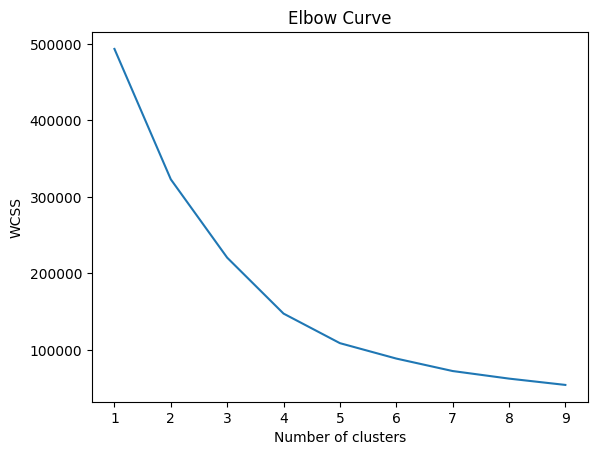

In [207]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(pca_X_train)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,10)
plt.rcdefaults()
plt.plot(number_clusters,wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [208]:
kmeans = KMeans(6)
kmeans.fit(pca_X_train, y_train)
identified_clusters = kmeans.fit_predict(pca_X_test)
identified_clusters = pd.DataFrame(identified_clusters, columns=['Cluster'])

In [209]:
identified_clusters

,Cluster
0,1
1,0
2,2
3,2
4,0
...,...
29995,3
29996,1
29997,3
29998,2


In [210]:
data_with_clusters = pca_X_test.copy()
data_with_clusters = pd.DataFrame(data_with_clusters, columns=['PCA1', 'PCA2'])
data_with_clusters['Cluster'] = identified_clusters['Cluster']

In [211]:
# check the centroids of each cluster
centroids = kmeans.cluster_centers_
centroids

array([[-0.93493881,  0.22705347],
       [10.37066894,  0.51007744],
       [ 1.30064984,  0.12106958],
       [-0.27972489, -1.91453386],
       [-3.57861324, -0.74767672],
       [-0.65605299,  3.67798359]])

In [212]:
data_with_clusters

,PCA1,PCA2,Cluster
0,11.117959,0.547941,1
1,-0.731474,-0.188396,0
2,0.853305,1.305177,2
3,0.802930,1.684404,2
4,-0.869541,1.364229,0
...,...,...,...
29995,0.989133,-2.239367,3
29996,10.133208,-0.769731,1
29997,-0.821368,-2.577072,3
29998,0.832467,0.558733,2


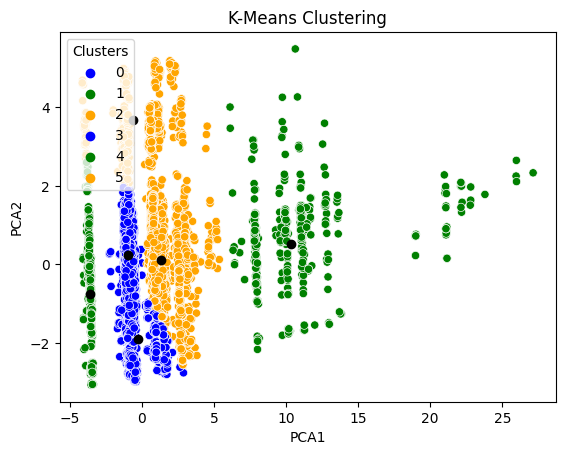

In [213]:
# plot the KMeans cluster with the Health category that is calculated
sns.scatterplot(x = 'PCA1', y='PCA2', data =data_with_clusters, hue='Cluster', palette=['blue', 'green', 'orange']).set(title="K-Means Clustering")
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.legend(title='Clusters', loc='upper left')
plt.show()

## 07 - Model Re-evaluation After Top 15 Feature Selection

### 01 -  Decision Tree Classifier

In [214]:
for max_depth_val in [3, 5, 10]:
    k_fold = KFold(n_splits = 4)
    clf = DecisionTreeClassifier(max_depth = max_depth_val)
    print("Evaluating Decision Tree for max_depth = %s" %(max_depth_val))
    y_pred_dtree = tree.fit(X_train, y_train).predict(X_test)
    y_pred_dtree_proba = tree.fit(X_train, y_train).predict_proba(X_test)

    cv_precision = cross_val_score(clf, X_train, y_train, cv = k_fold, scoring = 'recall_weighted')
    precision = recall_score(y_test, y_pred_dtree, average = 'weighted')
    print("Cross validation Recall: %s" %(cv_precision.mean()))
    print("Test Recall: %s" %(precision.mean()))

Evaluating Decision Tree for max_depth = 3
Cross validation Recall: 0.8311261721077939
Test Recall: 0.8314333333333334
Evaluating Decision Tree for max_depth = 5
Cross validation Recall: 0.8325404888442606
Test Recall: 0.8315333333333333
Evaluating Decision Tree for max_depth = 10
Cross validation Recall: 0.8292547190451699
Test Recall: 0.8315666666666667


In [215]:
print(classification_report(y_test,y_pred_dtree))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     24906
           1       0.53      0.08      0.13      5094

    accuracy                           0.83     30000
   macro avg       0.68      0.53      0.52     30000
weighted avg       0.79      0.83      0.78     30000



### 03 - Random Forest Classifier

In [216]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [10],
    'n_estimators':[2,5,10,20,50],
    'min_samples_split': [2, 3, 4],
    'max_features' : ['log2']
}

rf = RandomForestClassifier(random_state=42)

rf_search = RandomizedSearchCV(estimator = rf, param_distributions=param_grid,
                               cv = 5, n_jobs = -1, verbose = 2, n_iter = 10)

model = rf_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [217]:
rf_search.best_params_

{'n_estimators': 20,
 'min_samples_split': 3,
 'max_features': 'log2',
 'max_depth': 10,
 'bootstrap': True}

In [218]:
clf_rf = RandomForestClassifier(n_estimators= 20,
                                min_samples_split= 3,
                                max_features= 'log2',
                                max_depth= 10,
                                bootstrap= True,
                                random_state=42)
clf_rf.fit(X_train,y_train)


rf_predict = clf_rf.predict(X_test)
rf_predict_proba = clf_rf.predict_proba(X_test)

print(confusion_matrix(y_test, rf_predict))
prec = precision_score(y_test, rf_predict, average = 'weighted')
recall = recall_score(y_test, rf_predict, average = 'weighted')
print("Precision: %s, Recall: %s" %(prec, recall))


rf_prob = clf_rf.predict_proba(X_test)
rf_fpr,rf_tpr,_ = roc_curve(y_test,rf_prob[:,1])


[[24715   191]
 [ 4818   276]]
Precision: 0.7951144456631137, Recall: 0.8330333333333333


In [219]:
print(classification_report(y_test,rf_predict))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     24906
           1       0.59      0.05      0.10      5094

    accuracy                           0.83     30000
   macro avg       0.71      0.52      0.50     30000
weighted avg       0.80      0.83      0.77     30000



### 03 - Gradient Boosting

In [220]:
gbc = GradientBoostingClassifier(random_state=42).fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)
gbc_pred_proba = gbc.predict_proba(X_test)
recall_gbc = round(recall_score(y_test, gbc_pred),4)
precision_gbc = round(precision_score(y_test, gbc_pred),4)

print('Recall :\t {}'.format(recall_gbc))
print('Precision :\t {}:'.format(precision_gbc))


roc_auc_score = metrics.roc_auc_score(y_test,gbc_pred)
print(roc_auc_score)
print(gbc.score(X_test,y_test))
gbc_fpr,gbc_tpr,_ = roc_curve(y_test,gbc_pred)


from sklearn.model_selection import KFold,cross_val_score
# Set up k-fold
k_fold = KFold(n_splits = 5)

# Evaluate precision and recall for each fold
precision = cross_val_score(
    gbc, X_train, y_train, cv = k_fold, scoring = 'precision_weighted')
recall = cross_val_score(
    gbc, X_train, y_train, cv = k_fold, scoring = 'recall_weighted')
print("Precision scores: %s" %(precision.mean()))
print("Recall scores: %s" %(recall.mean()))
print(k_fold)


Recall :	 0.043
Precision :	 0.6152:
0.5187455362197197
0.8329333333333333
Precision scores: 0.7923250703688887
Recall scores: 0.8320690467686468
KFold(n_splits=5, random_state=None, shuffle=False)


In [221]:
print(classification_report(y_test,gbc_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     24906
           1       0.62      0.04      0.08      5094

    accuracy                           0.83     30000
   macro avg       0.73      0.52      0.49     30000
weighted avg       0.80      0.83      0.77     30000



## 08 - XGBoost

In [222]:
preds = np.zeros((y_test.shape[0],2))
#kf = KFold(n_splits=5,random_state=48,shuffle=True)
params = {
    "objective": "binary:logistic",
    "n_estimators": 100,
    "learning_rate": 0.1,
    "booster" : "gbtree",
    "eval_metric": "logloss",
    "eta":0.1,
    "max_depth": 8,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "silent": 1,
}
xgclf=xgb.XGBClassifier(**params)

In [223]:
xgclf.fit(X_train, y_train,
          eval_set=[(X_test, y_test)],
          #          eval_metric='logloss',
          verbose=False)

[13:46:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False, eta=0.1,
              eval_metric='logloss', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=8, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', ...)

In [224]:
xgpred_prob=xgclf.predict_proba(X_test)
#preds+=model.predict_proba(X_test)/kf.n_splits
#xgpred = [round(value) for value in xgpred_prob]

roc_auc_score = metrics.roc_auc_score(y_test,xgpred_prob[:,1])
print(roc_auc_score)
print(xgclf.score(X_test,y_test))
xgb_fpr,xgb_tpr,_ = roc_curve(y_test,xgpred_prob[:,1])



0.7088338647227986
0.8326333333333333


In [225]:
print(classification_report(y_test,xgclf.fit(X_train,y_train).predict(X_test)))

[13:46:15] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     24906
           1       0.56      0.07      0.12      5094

    accuracy                           0.83     30000
   macro avg       0.70      0.53      0.51     30000
weighted avg       0.79      0.83      0.77     30000



In [226]:
def conf_matrix(y_test, y_predicted):
    cm = confusion_matrix(y_test, y_predicted)
    plt.figure(figsize=(8,8))
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.tab20b)
    classNames = ['Negative','Positive']
    plt.title('Confusion Matrix - XGBoost\n')
    plt.ylabel('True label\n')
    plt.xlabel('\nPredicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),color="white",fontsize=18)
    plt.savefig("09 - XGBoost Confusion Matrix.jpeg",dpi=400, bbox_inches='tight')
    plt.show()

[13:46:23] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.



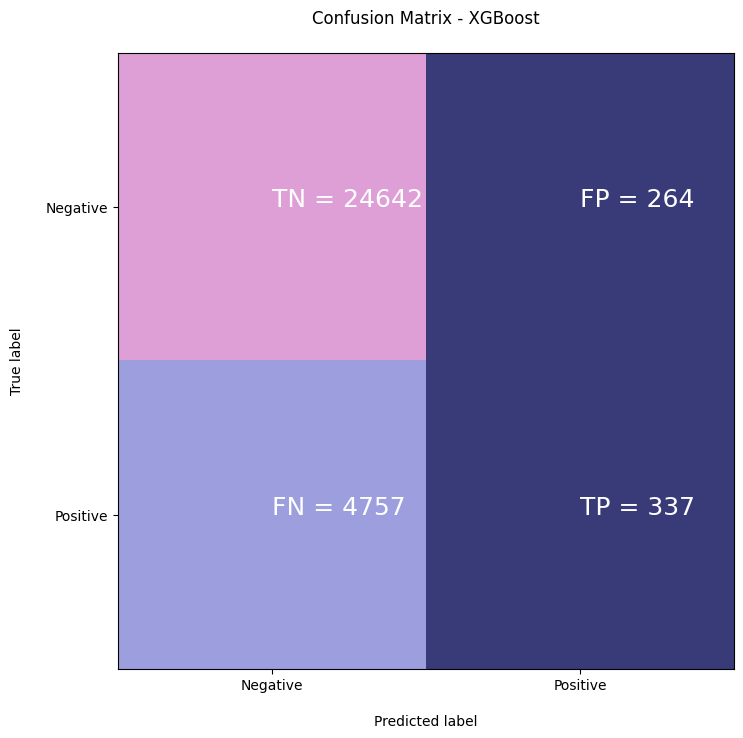

In [227]:
conf_matrix(y_test,xgclf.fit(X_train,y_train).predict(X_test))

In [228]:
results = xgclf.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)]).evals_result()

[13:46:31] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation_0-logloss:0.64771	validation_1-logloss:0.64803
[1]	validation_0-logloss:0.61043	validation_1-logloss:0.61108
[2]	validation_0-logloss:0.57961	validation_1-logloss:0.58062
[3]	validation_0-logloss:0.55408	validation_1-logloss:0.55537
[4]	validation_0-logloss:0.53254	validation_1-logloss:0.53414
[5]	validation_0-logloss:0.51443	validation_1-logloss:0.51636
[6]	validation_0-logloss:0.49908	validation_1-logloss:0.50133
[7]	validation_0-logloss:0.48610	validation_1-logloss:0.48873
[8]	validation_0-logloss:0.47507	validation_1-logloss:0.47804
[9]	validation_0-logloss:0.46595	validation_1-logloss:0.46929
[10]	validation_0-logloss:0.45777	validation_1-logloss:0.46145
[11]	validation_0-logloss:0.45077	validation_1-logloss:0.45476
[12]	validation_0-logloss:0.44504	validation_1-logloss:0.44937
[13]	valida

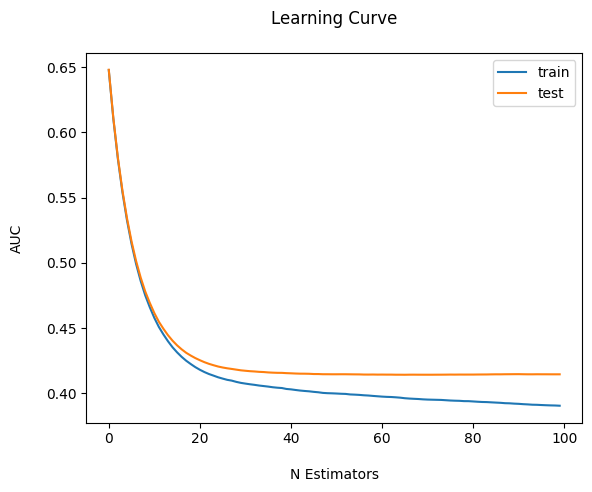

In [229]:
# plot learning curves
plt.plot(results['validation_0']['logloss'], label='train')
plt.plot(results['validation_1']['logloss'], label='test')
plt.title("Learning Curve\n")
plt.ylabel("AUC\n")
plt.xlabel("\nN Estimators")
plt.grid(False)
# show the legend
plt.legend()
plt.savefig("08 - XGBoost Learning Curve.jpeg",dpi=400, bbox_inches='tight')
# show the plot
plt.show()

# <font color="gray">Appendix - Some more models were attempted</font>

## 01 - AdaBoost

In [230]:
#svc = SVC(probability=True, kernel='linear')
print(dt.datetime.now())
ada = AdaBoostClassifier(n_estimators=200, base_estimator=DecisionTreeClassifier(max_depth=10),
                         learning_rate=0.05)
print(dt.datetime.now())
adamodel = ada.fit(X_train, y_train)
print(dt.datetime.now())

2022-11-15 13:46:39.561995
2022-11-15 13:46:39.562332
2022-11-15 13:47:28.117138


In [231]:
y_ada_pred = adamodel.predict(X_test)
y_ada_pred_proba = adamodel.predict_proba(X_test)
roc_auc_scr = metrics.roc_auc_score(y_test, y_ada_pred)
print(dt.datetime.now())
print(roc_auc_scr)
print(metrics.roc_auc_score(y_test, y_ada_pred_proba[:,1]))
print(adamodel.score(X_test, y_test))
ada_fpr, ada_tpr, _ = roc_curve(y_test, y_ada_pred)
print(dt.datetime.now())

2022-11-15 13:47:30.782142
0.5352857722657924
0.6447214947913618
0.8193
2022-11-15 13:47:31.966005


In [232]:
print('Random Forest',metrics.roc_auc_score(y_test,rf_predict))
print('Decision Tree',metrics.roc_auc_score(y_test,y_pred_dtree))
print('Gradient Boosting',metrics.roc_auc_score(y_test,gbc_pred))
#print('XGBoost',metrics.roc_auc_score(y_test,xgpred_prob[:,1]))
print('Ada Boost',metrics.roc_auc_score(y_test,y_ada_pred))

Random Forest 0.5232562775257583
Decision Tree 0.5309616691149771
Gradient Boosting 0.5187455362197197
Ada Boost 0.5352857722657924


In [233]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

Text(0.5, 1.0, 'AUC-ROC Curve')

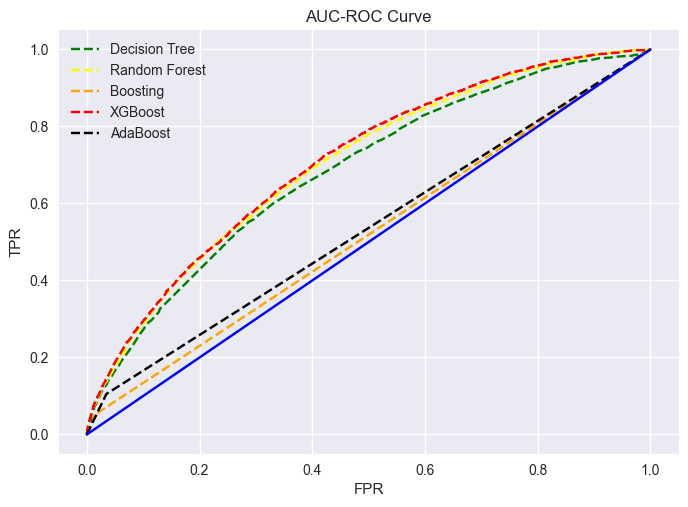

In [234]:
plt.style.use('seaborn')
plt.plot(fpr,tpr,linestyle = '--',color = 'green',label='Decision Tree')
plt.plot(rf_fpr,rf_tpr,linestyle = '--',color = 'yellow',label='Random Forest')
plt.plot(gbc_fpr,gbc_tpr,linestyle = '--',color = 'orange',label='Boosting')
plt.plot(xgb_fpr,xgb_tpr,linestyle = '--',color = 'red',label='XGBoost')
plt.plot(ada_fpr,ada_tpr,linestyle = '--',color = 'black',label='AdaBoost')
plt.plot(p_fpr,p_tpr,linestyle='solid',color = 'blue')
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC-ROC Curve')

## 02 - Bagging

In [235]:
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train,y_train)
baseline_acc = dummy_classifier.score(X_test,y_test)


### For verifying answer:
print("Baseline Accuracy = ", baseline_acc)

Baseline Accuracy =  0.8302


In [236]:
def create_bootstrap_sample(df):
    return df.sample(n= df.shape[0], replace = True)

bootstrap_sample = create_bootstrap_sample(X_train)

print('Number of rows should be the same:')
print('Number of rows in X_train:  ', X_train.shape[0])
print('Number of rows in bootstrap:', create_bootstrap_sample(X_train).shape[0])

print(bootstrap_sample)

Number of rows should be the same:
Number of rows in X_train:   69999
Number of rows in bootstrap: 69999
            C16  site_category  app_domain       C21       C14       C17  \
37026 -0.215356       2.087936   -0.449287 -0.856245 -0.453394 -0.414716   
70439 -0.215356      -0.963454    1.893331 -0.171187  0.471669  0.509244   
13291 -0.215356       0.053676   -0.449287  1.056209  0.588768  0.644297   
93906 -0.215356       1.070806   -0.449287 -0.057010 -0.637436 -0.646941   
65620 -0.215356       1.070806   -0.449287 -0.057010 -0.637436 -0.646941   
...         ...            ...         ...       ...       ...       ...   
28707 -0.215356      -0.963454   -0.449287 -0.527988  0.430209  0.421954   
74460 -0.215356       0.053676   -0.449287 -0.856245 -0.322138 -0.399893   
10296 -0.215356       0.053676   -0.449287 -0.313907 -1.900247 -1.999117   
58032 -0.215356      -0.963454   -0.449287  1.355922  0.697778  0.754645   
61812 -0.215356      -0.963454    0.722022 -0.856245 -0.372

In [237]:
model_bagging = BaggingClassifier(random_state = 42)
model_bagging.fit(X_train, y_train)
pred_bagging = model_bagging.predict(X_test)
acc_bagging = accuracy_score(y_test, pred_bagging)

print(' Accuracy = ', acc_bagging)

 Accuracy =  0.8119333333333333


In [238]:
print('Classification Report:\n')
print(classification_report(y_test, pred_bagging))

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     24906
           1       0.36      0.13      0.19      5094

    accuracy                           0.81     30000
   macro avg       0.60      0.54      0.54     30000
weighted avg       0.76      0.81      0.77     30000



In [239]:
def print_recall_scores(ensemble, feats, true_labels):
    '''
    Prints the recall scores for base estimators in a sklearn ensemble model.
    '''
    scores = []
    for model_idx, model in enumerate(ensemble.estimators_):
        if model_idx == 0:
            print('='*40)
        preds = model.predict(feats)
        scores.append(recall_score(true_labels, preds))
        model_recall = np.round(recall_score(true_labels, preds), 5)
        print(f'Recall for Base Model {model_idx+1}:\t', model_recall)
        if model_idx < (len(ensemble.estimators_) - 1):
            print('-'*40)
        else:
            print('='*40)
    ensemble_preds = ensemble.predict(feats)
    print("Mean Recall Score:\t\t", np.round(np.array(scores).mean(), 5))
    print("Std Deviation:\t\t\t", np.round(np.array(scores).std(), 5))
    print("Range:\t\t\t\t", np.round(np.array(scores).ptp(), 5))
    print(f'Overall Recall for model:\t {np.round(recall_score(y_test, ensemble_preds), 5)}')

In [240]:
print_recall_scores(model_bagging, X_test, y_test)

Recall for Base Model 1:	 0.1545
----------------------------------------
Recall for Base Model 2:	 0.14507
----------------------------------------
Recall for Base Model 3:	 0.14802
----------------------------------------
Recall for Base Model 4:	 0.15508
----------------------------------------
Recall for Base Model 5:	 0.14272
----------------------------------------
Recall for Base Model 6:	 0.15391
----------------------------------------
Recall for Base Model 7:	 0.14605
----------------------------------------
Recall for Base Model 8:	 0.14664
----------------------------------------
Recall for Base Model 9:	 0.15096
----------------------------------------
Recall for Base Model 10:	 0.14645
Mean Recall Score:		 0.14894
Std Deviation:			 0.00414
Range:				 0.01237
Overall Recall for model:	 0.13408


In [241]:
model_bagging.estimators_[2]

DecisionTreeClassifier(random_state=1449071958)

In [242]:
bag_fpr, bag_tpr, _ = roc_curve(y_test, model_bagging.estimators_[2].predict(X_test))
print(metrics.roc_auc_score(y_test,model_bagging.estimators_[2].predict_proba(X_test)[:,1]))

0.6097464826601575


# <font color="orange">ROC AUC Scores for all the Models built</font>

In [243]:
roc_scores_df = pd.DataFrame(np.array([["Random Forest",metrics.roc_auc_score(y_test,rf_predict_proba[:,1])],
                                       ["Decision Tree",metrics.roc_auc_score(y_test,y_pred_dtree_proba[:,1])],
                                       ["Gradient Boosting",metrics.roc_auc_score(y_test,gbc_pred_proba[:,1])],
                                       ["XGBoost",metrics.roc_auc_score(y_test,xgpred_prob[:,1])],
                                       ["AdaBoost",metrics.roc_auc_score(y_test,y_ada_pred_proba[:,1])],
                                       ["Bagging",metrics.roc_auc_score(y_test,model_bagging.estimators_[2].predict_proba(X_test)[:,1])]]),
                             columns=["Modeling Technique","Roc_AUC_Score"])
roc_scores_df.sort_values(by="Roc_AUC_Score",ascending=False,inplace=True)
roc_scores_df

,Modeling Technique,Roc_AUC_Score
3,XGBoost,0.7088338647227986
0,Random Forest,0.7028449230591122
2,Gradient Boosting,0.691397905043261
1,Decision Tree,0.6853085426094143
4,AdaBoost,0.6447214947913618
5,Bagging,0.6097464826601575


# <font color="green">Final ROC AUC Curve for the assignment</font>

In [244]:
sns.set_style("dark", {'axes.grid' : True, 'axes.edgecolor': 'lightblue'})

[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=2; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_split=4, n_estimators=50; total time=   6.4s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=5; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=50; total time=   5.9s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_split=4, n_estimators=10; total time=   1.1s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=5; total time=   0.6s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=20; total time=   2.1s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=20; total time=   1.9s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_split=3, n_es

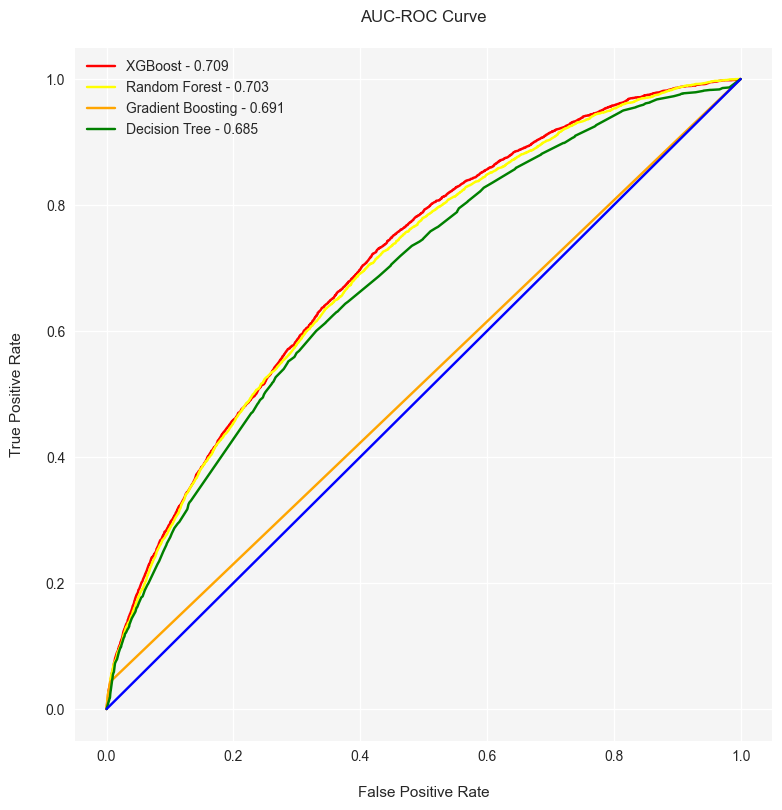

In [246]:
plt.figure(figsize=(9,9))
res1 = sns.lineplot(x=xgb_fpr,y=xgb_tpr,dashes=True,color = 'red',label=roc_scores_df["Modeling Technique"].iloc[0]+" - "+str(round(float(roc_scores_df["Roc_AUC_Score"].iloc[0]),3)))
res2 = sns.lineplot(x=rf_fpr,y=rf_tpr,dashes=True,color = 'yellow',label=roc_scores_df["Modeling Technique"].iloc[1]+" - "+str(round(float(roc_scores_df["Roc_AUC_Score"].iloc[1]),3)))
res3 = sns.lineplot(x=gbc_fpr,y=gbc_tpr,dashes=True,color = 'orange',label=roc_scores_df["Modeling Technique"].iloc[2]+" - "+str(round(float(roc_scores_df["Roc_AUC_Score"].iloc[2]),3)))
res4 = sns.lineplot(x=fpr,y=tpr,dashes=True,color = 'green',label=roc_scores_df["Modeling Technique"].iloc[3]+" - "+str(round(float(roc_scores_df["Roc_AUC_Score"].iloc[3]),3)))
#res5 = sns.lineplot(x=ada_fpr,y=ada_tpr,dashes=True,color = 'black',label=roc_scores_df["Modeling Technique"].iloc[4]+" - "+str(round(float(roc_scores_df["Roc_AUC_Score"].iloc[4]),3)))
#res6 = sns.lineplot(x=bag_fpr,y=bag_tpr,dashes=True,color = 'purple',label=roc_scores_df["Modeling Technique"].iloc[5]+" - "+str(round(float(roc_scores_df["Roc_AUC_Score"].iloc[5]),3)))
res4.set_facecolor('#f5f5f5')
res7 = sns.lineplot(x=p_fpr,y=p_tpr,dashes=True,color = 'blue')
plt.legend()
plt.grid(True)
res4.set_xlabel('\nFalse Positive Rate')
res4.set_ylabel('True Positive Rate\n')
res4.set_title('AUC-ROC Curve\n')
plt.savefig("10 - Final ROC AUC Curve.jpeg",dpi=400, bbox_inches='tight')
plt.show()

# Which 3 methods of classification are chosen and why?

# 1. Decision Trees:

    Simple to understand and to interpret
    Requires little data preparation
    Able to handle both numerical and categorical data
# 2. Random Forest and Bagging Classifier:

    It can perform both regression and classification tasks
    A random forest produces good predictions that can be understood easily
    It can handle large datasets efficiently
    The random forest algorithm provides a higher level of accuracy in predicting outcomes over the decision tree algorithm
# 3. Gradient Boosting Algorithms - in this case XGBoost:

    Boosting comes with an easy-to-read and interpret algorithm, making its prediction interpretations easy to handle
    Boosting is a resilient method that curbs over-fitting easily
    The prediction capability is efficient through the use of its clone methods, such as bagging or random forest and decision trees

# Which method among the 3 chosen is working better than the other 2?

###   1. As evident from the above plot, the simple decision tree performed the worst as expected with the lowest auc score of 68.5%
###   2. The random forests and the gradient classifier did considerably better with a AUC score of 70% and 69%
###   3. XGBoost classifer did the best with a largest area under the curve of 70.9%
Hence we will be using Random Forest as our final model as the gains with XGBoost were not significant and thus we can pick a simpler model.

# How is feature engineering changing the results of the evaluation metrics?

###   1. Clearly evident from our model before and after feature engineering, there is an improvement in accuracy
###   2. Also the recall, precision and F1 score has also improved to an extent
###   3. The reason for this is as model complexity increases, bias reduces but the variance tends to increase due to overfitting